# Project Overview

### Industrial safety and Health-NLP based Chatbot.


* The main Aim of the project is to predict and design a ML/DL based chatbot utility which can help the proffessionals to highlight the safety risk as per the incident description by predicting Accident level/Potential accident level from the dataset.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import plotly
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx

#Data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

#ML classification models
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#For evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

#NLP libraries for preprocessing
import string
import re
import itertools
import nltk
import unicodedata
import unidecode
from nltk.corpus import stopwords
from nltk import tokenize, stem
from nltk.tokenize import word_tokenize
# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Text visualization
from wordcloud import WordCloud
#Importing necessary libarires
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score

# importing models
# fix random seed for reproducibility
from keras.layers import Input
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dropout, Dense, Flatten,BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from sklearn.pipeline import Pipeline

In [2]:
#Importing the data
data = pd.read_csv("Industrial_Safety.csv")

In [3]:
data

Unnamed: 0            Data   Countries     Local Industry Sector  \
0             0   1/1/2016 0:00  Country_01  Local_01          Mining   
1             1   1/2/2016 0:00  Country_02  Local_02          Mining   
2             2   1/6/2016 0:00  Country_01  Local_03          Mining   
3             3   1/8/2016 0:00  Country_01  Local_04          Mining   
4             4  1/10/2016 0:00  Country_01  Local_04          Mining   
..          ...             ...         ...       ...             ...   
420         434   7/4/2017 0:00  Country_01  Local_04          Mining   
421         435   7/4/2017 0:00  Country_01  Local_03          Mining   
422         436   7/5/2017 0:00  Country_02  Local_09          Metals   
423         437   7/6/2017 0:00  Country_02  Local_05          Metals   
424         438   7/9/2017 0:00  Country_01  Local_04          Mining   

    Accident Level Potential Accident Level   Genre Employee or Third Party  \
0                I                       IV    Male             Third Party   
1                I                       IV    Male                Employee   
2                I                      III    Male    Third Party (Remote)   
3                I                        I    Male             Third Party   
4               IV                       IV    Male             Third Party   
..             ...                      ...     ...                     ...   
420              I                      III    Male             Third Party   
421              I                       II  Female                Employee   
422              I                       II    Male                Employee   
423              I                       II    Male                Employee   
424              I                       II  Female             Third Party   

                    Critical Risk  \
0                         Pressed   
1             Pressurized Systems   
2                    Manual Tools   
3                          Others   
4                          Others   
..                            ...   
420                        Others   
421                        Others   
422              Venomous Animals   
423                           Cut   
424  Fall prevention (same level)   

                                           Description  
0    While removing the drill rod of the Jumbo 08 f...  
1    During the activation of a sodium sulphide pum...  
2    In the sub-station MILPO located at level +170...  
3    Being 9:45 am. approximately in the Nv. 1880 C...  
4    Approximately at 11:45 a.m. in circumstances t...  
..                                                 ...  
420  Being approximately 5:00 a.m. approximately, w...  
421  The collaborator moved from the infrastructure...  
422  During the environmental monitoring activity i...  
423  The Employee performed the activity of strippi...  
424  At 10:00 a.m., when the assistant cleaned the ...  

[425 rows x 11 columns]

### Data Exploration/Cleansing

In [4]:
#Lets explore the data using pandas profiling
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Using pandas profiling we have a basic overivew of the data interms of attributes, correlations, distribution and warnings.

In [5]:
#Lets remove the "Unnamed" column
data.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
#Rename the columns
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Industry Sector':'Industry_Sector', 'Accident Level':'Accident_Level', 'Potential Accident Level':'Potential_Accident_Level', 'Genre':'Gender', 'Employee or Third Party':'Employee_type', 'Critical Risk': 'Critical_Risk'}, inplace=True)

In [7]:
#shape
print("Number of rows = {0} and Columns = {1} ".format(data.shape[0], data.shape[1]))

Number of rows = 425 and Columns = 10 


In [8]:
#Columns
data.columns

Index(['Date', 'Country', 'Local', 'Industry_Sector', 'Accident_Level',
       'Potential_Accident_Level', 'Gender', 'Employee_type', 'Critical_Risk',
       'Description'],
      dtype='object')

In [9]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry_Sector           425 non-null    object
 4   Accident_Level            425 non-null    object
 5   Potential_Accident_Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee_type             425 non-null    object
 8   Critical_Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


* From the above output we observe all column datatypes is object and are categorical columns.

* Also, as all the columns are categorical the data is free from outliers

In [10]:
#Check Duplictes
data.duplicated().sum()

7

In [11]:
duplicates = data.duplicated()
data[duplicates]

Date     Country     Local Industry_Sector Accident_Level  \
77    4/1/2016 0:00  Country_01  Local_01          Mining              I   
262  12/1/2016 0:00  Country_01  Local_03          Mining              I   
303  1/21/2017 0:00  Country_02  Local_02          Mining              I   
345   3/2/2017 0:00  Country_03  Local_10          Others              I   
346   3/2/2017 0:00  Country_03  Local_10          Others              I   
355  3/15/2017 0:00  Country_03  Local_10          Others              I   
397  5/23/2017 0:00  Country_01  Local_04          Mining              I   

    Potential_Accident_Level Gender         Employee_type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical_Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

* As we observed there are duplicate rows lets remove/drop from the data.

In [12]:
#Drop Duplicates
data.drop_duplicates(inplace = True)

In [13]:
data.shape

(418, 10)

In [14]:
#Check missing Values
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry_Sector             0
Accident_Level              0
Potential_Accident_Level    0
Gender                      0
Employee_type               0
Critical_Risk               0
Description                 0
dtype: int64

* We can observe that there are no missing values in the data

In [15]:
#Unique values
data.nunique()

Date                        287
Country                       3
Local                        12
Industry_Sector               3
Accident_Level                5
Potential_Accident_Level      6
Gender                        2
Employee_type                 3
Critical_Risk                33
Description                 411
dtype: int64

* Lets do some analysis on columns from the data:
* Observe the unique values and the count in each column.
* There are 411 unique values in Description value out of 418 which means there are few duplicates in column Description.

In [16]:
#check for duplicates
data[data.duplicated(subset=['Description'],keep=False)].sort_values(by='Description')

Date     Country     Local Industry_Sector Accident_Level  \
166   7/7/2016 0:00  Country_01  Local_03          Mining             IV   
167   7/7/2016 0:00  Country_01  Local_03          Mining              I   
261  12/1/2016 0:00  Country_01  Local_03          Mining              I   
263  12/1/2016 0:00  Country_01  Local_03          Mining              I   
412  6/20/2017 0:00  Country_01  Local_01          Mining              I   
413  6/20/2017 0:00  Country_01  Local_01          Mining              I   
130  5/26/2016 0:00  Country_03  Local_10          Others              I   
131  5/26/2016 0:00  Country_03  Local_10          Others              I   
143   6/8/2016 0:00  Country_03  Local_10          Others              I   
144   6/8/2016 0:00  Country_03  Local_10          Others              I   
387   5/6/2017 0:00  Country_02  Local_07          Mining             IV   
388   5/6/2017 0:00  Country_02  Local_07          Mining             II   
37   2/24/2016 0:00  Country_02  Local_07          Mining              I   
38   2/24/2016 0:00  Country_02  Local_07          Mining              I   

    Potential_Accident_Level  Gender Employee_type Critical_Risk  \
166                        V    Male   Third Party        Others   
167                       IV    Male   Third Party        Others   
261                       IV    Male      Employee        Others   
263                       IV    Male   Third Party        Others   
412                       IV    Male      Employee        Others   
413                       IV    Male   Third Party        Others   
130                        I    Male   Third Party          Bees   
131                        I    Male      Employee        Others   
143                        I    Male   Third Party          Bees   
144                        I    Male   Third Party        Others   
387                        V    Male      Employee    Projection   
388                        V    Male      Employee    Projection   
37                         V    Male      Employee        Others   
38                         V  Female   Third Party        Others   

                                           Description  
166  At moments when the MAPERU truck of plate F1T ...  
167  At moments when the MAPERU truck of plate F1T ...  
261  During the activity of chuteo of ore in hopper...  
263  During the activity of chuteo of ore in hopper...  
412  In circumstance, the AHK-903 license plate (Em...  
413  In circumstance, the AHK-903 license plate (Em...  
130  In the geological reconnaissance activity, in ...  
131  In the geological reconnaissance activity, in ...  
143  Project of Vazante that carried out sediment c...  
144  Project of Vazante that carried out sediment c...  
387  The employees Márcio and Sérgio performed the ...  
388  The employees Márcio and Sérgio performed the ...  
37   When starting the activity of removing a coil ...  
38   When starting the activity of removing a coil ...

In [17]:
#Drop duplicates from column
data.drop_duplicates(subset=['Description'], keep='first', inplace=True)

In [18]:
data.shape

(411, 10)

In [19]:
for col in data:
    print(f'Unique values for {col} is:\n{data[col].unique()} \n Unique Value count is: \n{data[col].value_counts()}\n')

Unique values for Date is:
['1/1/2016 0:00' '1/2/2016 0:00' '1/6/2016 0:00' '1/8/2016 0:00'
 '1/10/2016 0:00' '1/12/2016 0:00' '1/16/2016 0:00' '1/17/2016 0:00'
 '1/19/2016 0:00' '1/26/2016 0:00' '1/28/2016 0:00' '1/30/2016 0:00'
 '2/1/2016 0:00' '2/2/2016 0:00' '2/4/2016 0:00' '2/6/2016 0:00'
 '2/7/2016 0:00' '2/8/2016 0:00' '2/21/2016 0:00' '2/25/2016 0:00'
 '2/9/2016 0:00' '2/10/2016 0:00' '2/15/2016 0:00' '2/14/2016 0:00'
 '2/13/2016 0:00' '2/16/2016 0:00' '2/17/2016 0:00' '2/19/2016 0:00'
 '2/20/2016 0:00' '2/18/2016 0:00' '2/22/2016 0:00' '2/24/2016 0:00'
 '2/29/2016 0:00' '2/26/2016 0:00' '2/27/2016 0:00' '3/2/2016 0:00'
 '3/3/2016 0:00' '3/4/2016 0:00' '3/5/2016 0:00' '3/6/2016 0:00'
 '3/9/2016 0:00' '3/11/2016 0:00' '3/13/2016 0:00' '3/12/2016 0:00'
 '3/14/2016 0:00' '3/16/2016 0:00' '3/10/2016 0:00' '3/17/2016 0:00'
 '3/18/2016 0:00' '3/19/2016 0:00' '3/22/2016 0:00' '3/25/2016 0:00'
 '3/30/2016 0:00' '3/31/2016 0:00' '4/1/2016 0:00' '4/3/2016 0:00'
 '4/2/2016 0:00' '3/24/201

#### Description 
* Number of Data points: 411
* Number of attributes: 10


## Data Pre-processing

In [20]:
data.describe(include=['object'])

Date     Country     Local Industry_Sector Accident_Level  \
count             411         411       411             411            411   
unique            287           3        12               3              5   
top     2/8/2017 0:00  Country_01  Local_03          Mining              I   
freq                6         245        87             232            303   

       Potential_Accident_Level Gender Employee_type Critical_Risk  \
count                       411    411           411           411   
unique                        6      2             3            33   
top                          IV   Male   Third Party        Others   
freq                        138    390           180           223   

                                              Description  
count                                                 411  
unique                                                411  
top     On leaving the Company the employee stumbled o...  
freq                                                    1

##### Observations:
   * Country_01 has most number of accidents happen.
   * Male gender and Third party employees are major in the accident.

* Lets convert the Date column to year,month,day,weekday

In [21]:
#Convert into additional features
import time
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data.Date.apply(lambda x : x.year)
data['Month'] = data.Date.apply(lambda x : x.month)
data['Day'] = data.Date.apply(lambda x : x.day)
data['Weekday'] = data.Date.apply(lambda x : x.day_name())
data.head(5)

Date     Country     Local Industry_Sector Accident_Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential_Accident_Level Gender         Employee_type        Critical_Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  
0     Friday  
1   Saturday  
2  Wednesday  
3     Friday  
4     Sunday

In [22]:
#Lets convert the year column to quarter.
def month(x):
    if x in [1,2,3]:
        quarter = 'First'
    elif x in [4,5,6]:
        quarter = 'Second'
    elif x in [7,8,9]:
        quarter = 'Third'
    elif x in [10,11,12]:
        quarter = 'Forth'
    return quarter
data['Quarter'] = data['Month'].apply(month)
data.head(5)

Date     Country     Local Industry_Sector Accident_Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential_Accident_Level Gender         Employee_type        Critical_Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday Quarter  
0     Friday   First  
1   Saturday   First  
2  Wednesday   First  
3     Friday   First  
4     Sunday   First

In [23]:
data.shape

(411, 15)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 424
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      411 non-null    datetime64[ns]
 1   Country                   411 non-null    object        
 2   Local                     411 non-null    object        
 3   Industry_Sector           411 non-null    object        
 4   Accident_Level            411 non-null    object        
 5   Potential_Accident_Level  411 non-null    object        
 6   Gender                    411 non-null    object        
 7   Employee_type             411 non-null    object        
 8   Critical_Risk             411 non-null    object        
 9   Description               411 non-null    object        
 10  Year                      411 non-null    int64         
 11  Month                     411 non-null    int64         
 12  Day                   

## Exploratory Data Analysis (EDA)



### Let's analyze the data for Univariate, bivariate analysis:

#### Country

In [25]:
labels = data['Country'].unique()
values = data['Country'].value_counts()
fig = px.pie(data, names='Country',height=None,width=None)
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.show()

* Country_01 has effected more number of accidents

#### Accident Level

In [26]:
px.bar(data.Accident_Level, color="value",height=400,width=700)

* Level-1 have more accidents which are minor and Level-5 accidents are severe.

#### Gender

In [27]:
px.bar(data, x=data["Gender"],color="Gender", title="Gender_count",height=400,width=700)

* Male count is high so data is more biased to male employees.

#### Industry Sector

In [28]:
px.bar(data.Industry_Sector, color="value",height=400,width=700)

* Mining industry has more number of accidents

#### Critical_Risk

In [29]:
px.bar((data.Critical_Risk[~data['Critical_Risk'].isin([''])].value_counts()),color=None,height=600,width=750)

* In Critical Risks most risks are classified as 'Others', which means too many risks to classify and it is also thought that it takes so much time to analyze risks and reasons why the accidents occured.

### Note:
 * Univariate and bivariate analysis is carried out by running Dash for better understanding it is sugessted to run every attribute in the below mentioned cell.

In [30]:
#For Univariate analysis
import ipywidgets 
from ipywidgets import interact
from ipywidgets import interact_manual
@interact_manual
def viz(x = list(data.select_dtypes('object').columns[1:])):
    sns.countplot(data[x])

interactive(children=(Dropdown(description='x', options=('Local', 'Industry_Sector', 'Accident_Level', 'Potent…

#### Univariate analysis

#### Local 
    Local_03 has maximum number of accidents. 
#### Accident_Level
    Level-1 have more accidents which are minor and Level-5 accidents are severe.
#### Potential_Accident_Level
    Potential accident levevel indicates how severe the accident is and has the highest count in Level-4.
    Level VI accident is having only one incident hence it can be replaced with Level V.
#### Employee_Type
    Employee type indicates which employee has effected more. it is observed that Employees and Third party employees are effected more.

In [31]:
## Bivariate analysis for categorical values with Dash
@interact_manual
def viz(x = list(data.select_dtypes('object').columns), y = list(data.select_dtypes('object').columns)[1:]):
    pd.crosstab(data[x], data[y]).plot(kind = 'bar', stacked = True)

interactive(children=(Dropdown(description='x', options=('Country', 'Local', 'Industry_Sector', 'Accident_Leve…

#### Bivariate analysis Observations:

#### 'Potential accident level' by 'Country'
    Country_01 has more number of severe accidents in Level IV
    Country_02 has moderate accidents across all the levels
    Country_03 level-I accident count is more compared to country_01 and 02 but less severe accidents.
#### 'Local' by 'Potential accident level'
    Local_03 is where most of the accidents happen
#### 'Potential Accident level counts' by 'Employee_Type'
    Third Party Employees are more effected in Accidents. We can observe that people are also facing severe accidents in Accident_Level_IV.
#### 'Industry_sector' by 'Local' 
    Industry Sector depends on the Local area.
    Local Area 1,2,3,4 and 7 belong to Mining Sector.
    Local Area 5,6,8 and 9 belong to Metal Sector.
    Local Area 10, 11 and 12 belong to Other Sectors.
#### 'Potential Accident level' by 'Gender'
    Males are more involved in Severe Accidents 

In [32]:
# ## Categorical vs Numerical Variables
# @interact_manual
# def viz(x = list(data.select_dtypes('object').columns[1:]),
#        y = list(data.select_dtypes('number').columns)[1:]):
#     sns.barplot(data[x], data[y])

In [33]:
# Multivariate Analysis

@interact_manual
def viz(x = list(data.select_dtypes('object').columns),
       y = list(data.select_dtypes('number').columns),
       hue = list(data.select_dtypes('object').columns[1:])):
    sns.barplot(data[x], data[y], hue = data[hue])

interactive(children=(Dropdown(description='x', options=('Country', 'Local', 'Industry_Sector', 'Accident_Leve…

* Likewise we can also perform  various multivariate analysis on different attributes.

<AxesSubplot:xlabel='Potential_Accident_Level', ylabel='Accident_Level'>

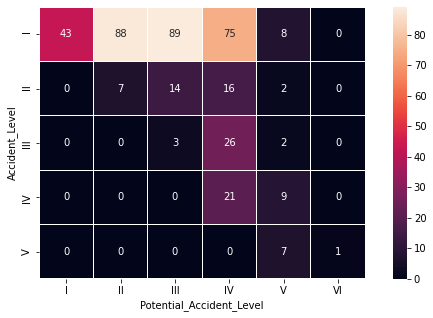

In [34]:
# Correlation b/w Accidents by Accident Level and Potential accident level
plt.figure(figsize = (10,5))
sns.heatmap(pd.crosstab(data.Accident_Level, data.Potential_Accident_Level), square=True, cmap=None, annot=True, linewidth=0.1)

* Acceptable corelation between Accident_Level and Potential_Accident_Level

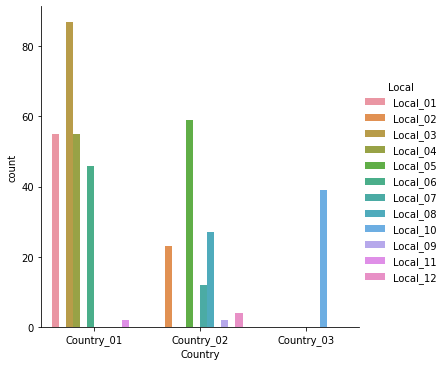

In [35]:
plot = sns.factorplot(data=data, kind="count", x="Country", hue = "Local", size=5, aspect=1)

* Country vs Local accidents count

#### Accident Level by Country with Critical Risk

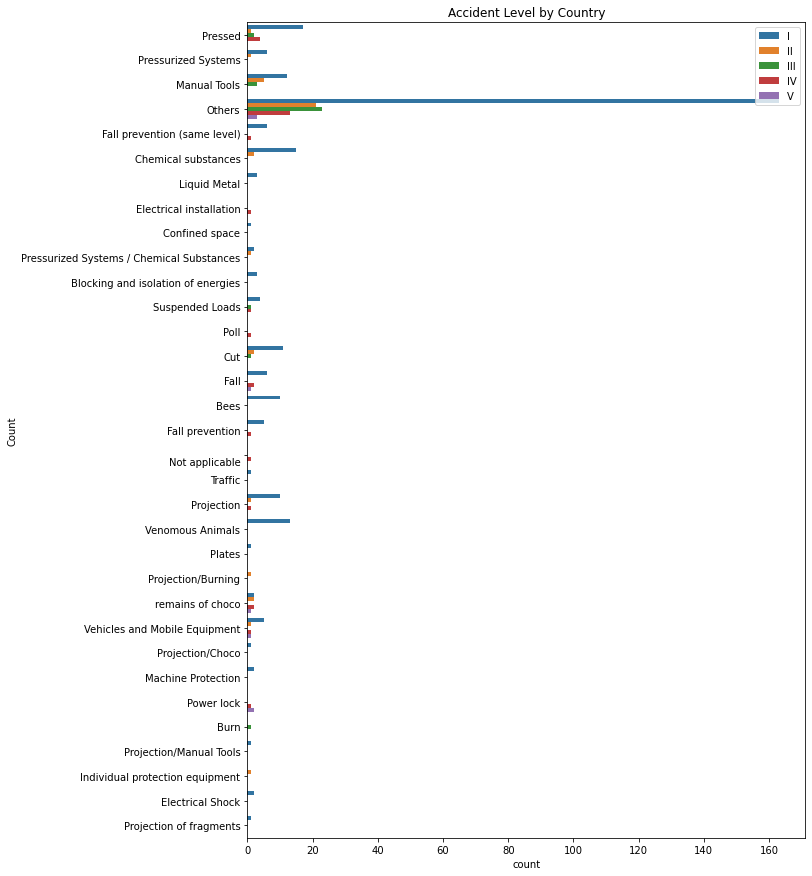

In [36]:
plt.figure(figsize=(10,15))
ax = sns.countplot(y = data['Critical_Risk'], hue=data['Accident_Level'], hue_order=data['Accident_Level'].value_counts().sort_index().index)
plt.title('Accident Level by Country')
plt.ylabel('Count')
plt.legend(loc='upper right')

* We can observe that more number of accident are occured in level-1 of others.
* Accident Level-1 have occured frequently which are not major.

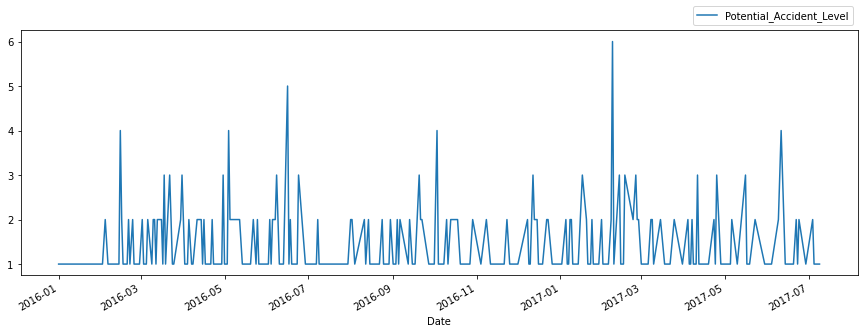

In [37]:
data.groupby('Date').count()['Potential_Accident_Level'].plot(figsize=(15,5))
plt.legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.5)

* Potential accident level with respect to Date
* We can also observe that accidents are from 1st Jan 2016 to 9th July 2017 in every month. 

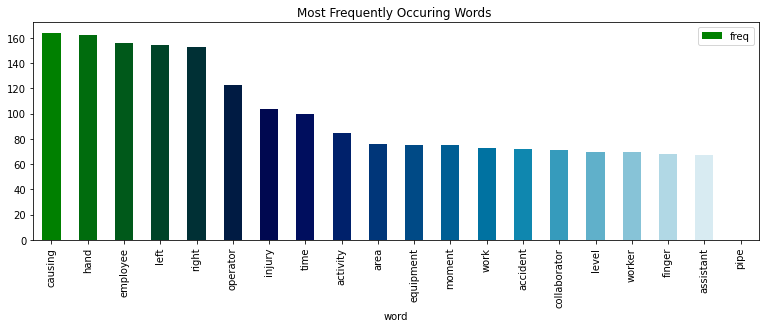

In [38]:
## Visualizing the Most Frequent Words from Description column
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.Description)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(13, 4), color = color)
plt.title("Most Frequently Occuring Words ")
plt.show()

* Word cloud only for Critical_Risk column

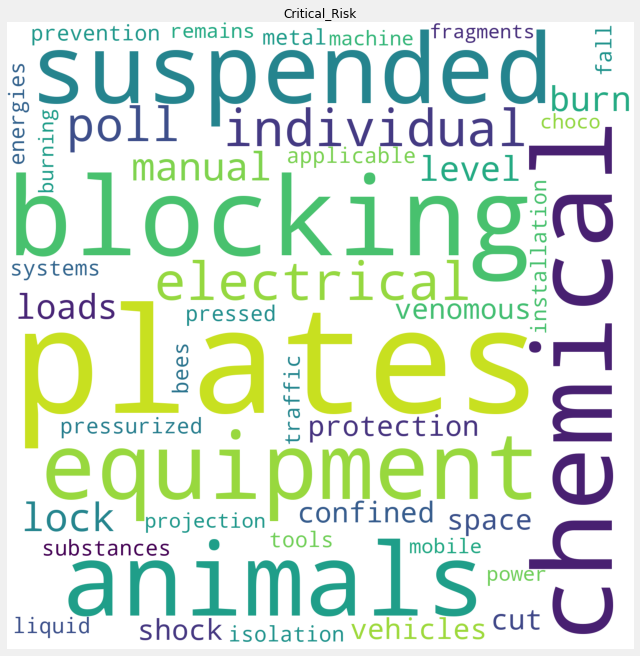

In [39]:
# wordcloud Visualization
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.Critical_Risk)
# sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'white', width = 1500, height = 1500).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Critical_Risk", fontsize = 12)
plt.show()

* We can observe Plates,chemical, equipment are the critical risks associated with the accidents.

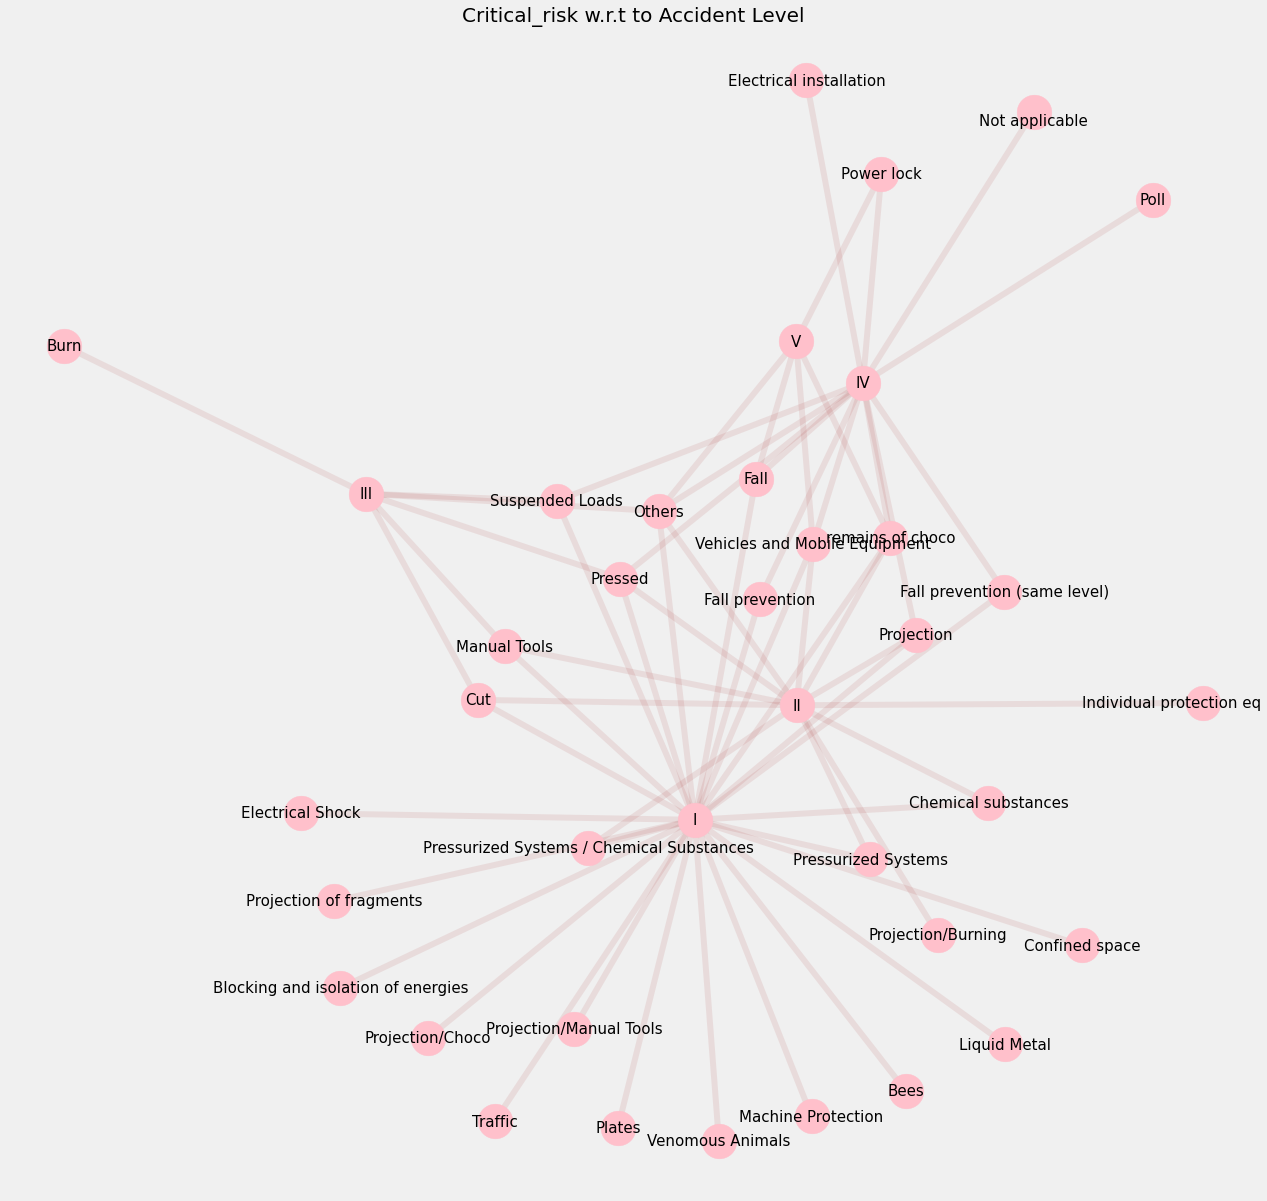

In [40]:
# Visualizing the Critical_risk vs Accident_level data through network
data_network = nx.from_pandas_edgelist(data,source='Accident_Level',target='Critical_Risk', edge_attr=True)
plt.rcParams['figure.figsize']  = (20, 20)
plt.style.use('fivethirtyeight')
plt.title('Critical_risk w.r.t to Accident Level', fontsize = 20)
plt.grid()
plt.axis('off')

pos = nx.spring_layout(data_network)

# drawing nodes
nx.draw_networkx_nodes(data_network, pos, node_size = 1200, node_color = 'pink')

# labels
nx.draw_networkx_labels(data_network, pos, font_size = 15, font_family = 'sans-serif')

# drawing edges
nx.draw_networkx_edges(data_network, pos, width = 6, alpha = 0.1, edge_color = 'brown')
plt.show()

* From the above figure we can observe the critical risk associated with Accident level.

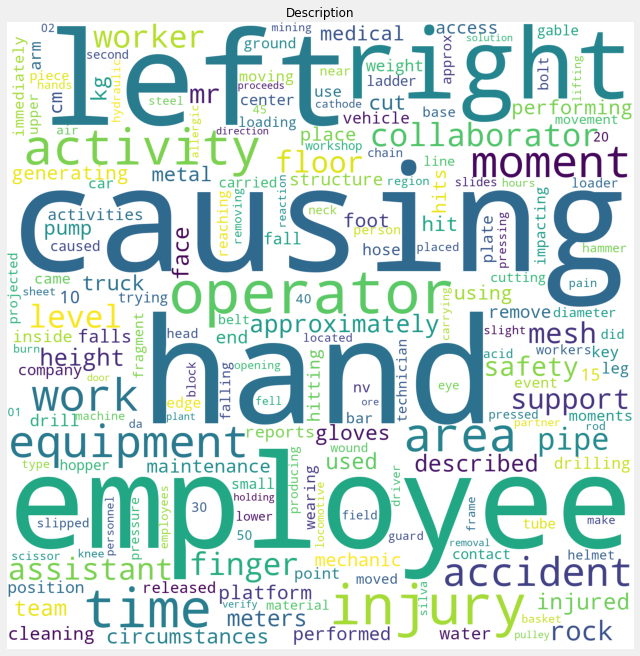

In [41]:
# lets plot the Wordscloud
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.Description)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'white', width = 1500, height = 1500).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Description", fontsize = 12)
plt.show()

* Above plot indicates the visualization of the most frequent Words from 'Description' column.
* From the wordcloud we can observe that most the accidents happen due to Body movement,Employee and equipment related aspects.

In [42]:
#Multivariate analysis
fig = px.scatter(data, y="Accident_Level", x="Critical_Risk", color="Industry_Sector", symbol="Industry_Sector",width = 850,height=550)
fig.update_traces(marker_size=10)
fig.show()

* Most number of accidents occured in mining Industry also has most severe accidents(Level-5) w.r.t to Accident level.

### NLP Analysis/Pre-processing

In [43]:
# Checking for Empty Strings in the Description Column
empty_list= []
for empty, Data in enumerate(data.Description):
    if len(Data) == 0:
        empty_list.append(empty)
print(empty_list)

[]


* So we don't have any empty strings. Lets Start processing our text.

In [44]:
data.Description.value_counts()

On leaving the Company the employee stumbled onto the exit ladder of the building and fell 3 steps, causing twisting of the ankle and grating on the cinnamon                                                                                                                                                                                                                                                                                                      1
The mincing team was carrying out activities in the city of Juína and was coordinated by mining technician Felipe a time when the mining technician was last in line and more away from the team, was bitten by a blackjack on the left side of his face. There was no allergic manifestation and the team continued the work. In the afternoon, after lunch, the employee sought medical care, was medicated and released to continue activities the next day.    1
Being 05:30 am. Approximately Marco and Isidro TORRES they were performing the pipe standardiz

* Description indicates the cause of accidents

In [45]:
data['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

#### Text Processing

- Converting the description column to lower case.
- Removing punctuations and Tags.
- Removing stopwords,empty tokens. 

In [46]:
# Preprocessing NLP Data
def clean_text(text):
    
    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    # Remove puncutation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove Html Tags like <br>
    text= re.sub(r'<[^>]+>' , "", text)

    # Normalize the text in order deal with accented words and unicodes
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets and numbers from the text
    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()

    # Consider the words which are not in stopwords of english and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    # #remove non-alphabetical characters like '(', '.' or '!'
    # alphas = [i for i in lems if (i.isalpha() or i.isnumeric()) and (i not in stopwords)]

    words = [w for w in lems if len(w)>2]

    return words

In [47]:
#Create a new feature after cleaning the description column
corpus = clean_text(' '.join(data['Description'].sum().split()))
data['Clean_Description'] = data.apply(lambda x: " ".join(clean_text(x.Description)), axis=1)

In [48]:
#Compare the Description columns
data[['Description', 'Clean_Description']].head(10)

Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   
4  Approximately at 11:45 a.m. in circumstances t...   
5  During the unloading operation of the ustulado...   
6  The collaborator reports that he was on street...   
7  At approximately 04:50 p.m., when the mechanic...   
8  Employee was sitting in the resting area at le...   
9  At the moment the forklift operator went to ma...   

                                   Clean_Description  
0  removing drill rod jumbo maintenance superviso...  
1  activation sodium sulphide pump piping uncoupl...  
2  substation milpo located level collaborator ex...  
3  approximately personnel begin task unlocking s...  
4  approximately circumstance mechanic anthony gr...  
5  unloading operation ustulado bag need unclog d...  
6  collaborator report street holding left hand v...  
7  approximately mechanic technician jose tecnomi...  
8  employee sitting resting area level raise bore...  
9  moment forklift operator went manipulate big b...

#### N-gram, uni-gram, Bi-gram

In [49]:
# Generate ngrams
def generate_ngrams(data1, num):
    # ngrams on Description column word count for each token for top 20 words
    word_count  = nltk.FreqDist(nltk.ngrams(data1, num)).most_common(20) 

    # Create a df for word_count
    word_count = pd.DataFrame(word_count, columns=['Words', 'Count'])
    word_count.Words = [' '.join(i) for i in word_count.Words]
    word_count.set_index('Words', inplace=True) 
    return word_count

In [50]:
# Top 20 Uni-grams
uni_grams = generate_ngrams(corpus, 1)
print(uni_grams)

              Count
Words              
causing         164
hand            154
left            153
right           152
employee        141
operator        128
time            111
moment           97
activity         95
worker           83
collaborator     77
area             74
work             73
assistant        73
finger           72
equipment        71
hit              70
level            69
pipe             69
accident         68


<AxesSubplot:xlabel='Words'>

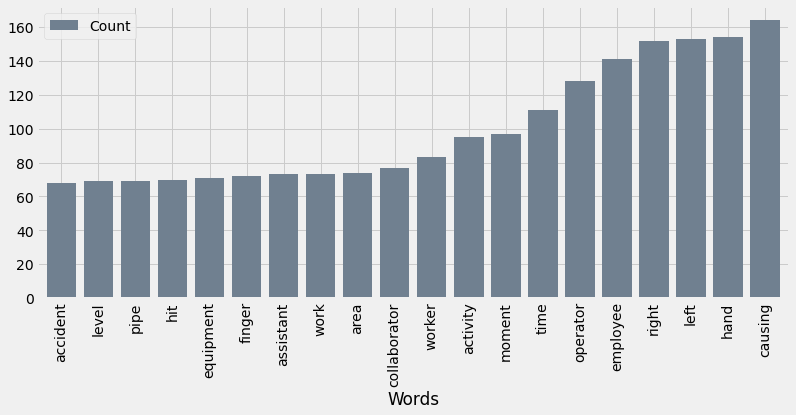

In [51]:
uni_grams.sort_values(by='Count').plot.bar(color = 'slategrey', width = 0.8, figsize = (12,5))

* We can observe some of the occuring uni-grams 
* Employee: employee, operator, collaborator, assistant
* Movement: fall, hit, slip, level
* Equipment: equipment, pipe, collaborater
* Accident: causing, accident

In [52]:
# Bi-Grams
bi_grams = generate_ngrams(corpus, 2)
print(bi_grams)

                     Count
Words                     
left hand               59
time accident           54
right hand              48
causing injury          35
finger left             25
hand causing            15
fragment rock           15
medical center          15
injured person          15
finger right            14
injury time             14
right side              13
support mesh            13
left foot               12
wearing safety          10
employee report         10
time event              10
accident employee       10
made use                 9
circumstance worker      9


<AxesSubplot:xlabel='Words'>

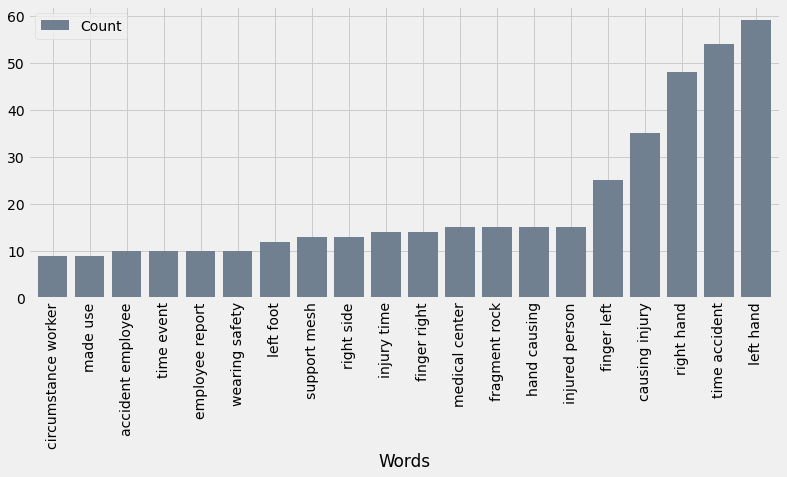

In [53]:
bi_grams.sort_values(by='Count').plot.bar(color = 'slategrey', width = 0.8, figsize = (12,5))

* We can observe some of the occuring bi-grams 
* Employee: employee report, circumstance worker, operator, collaborator, assistant
* Movement: right side, left foot, finger left, right and left hand 
* Equipment: equipment,safety, support mesh
* Accident: accident, accident employee

#### Plot the Wordcloud for Clean_Description

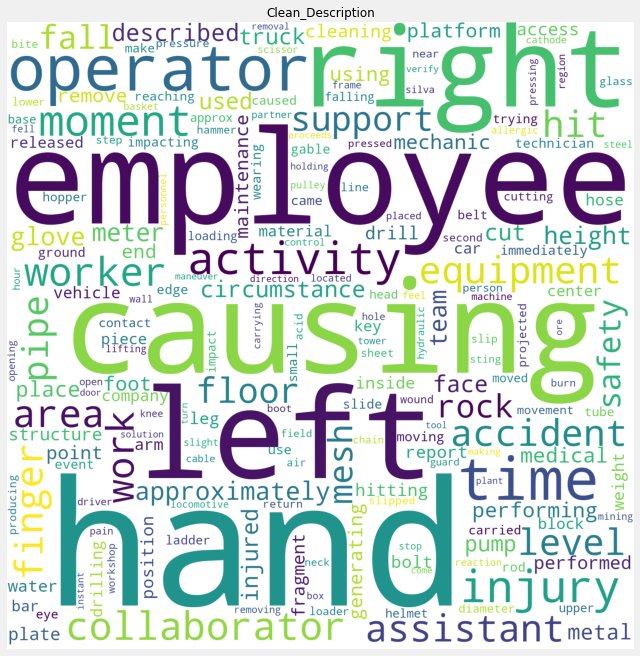

In [54]:
# wordcloud Visualization
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.Clean_Description)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
wordcloud = WordCloud(background_color = 'white', width = 1500, height = 1500).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Clean_Description", fontsize = 12)
plt.show()

* Clean_Description column contains the details of why accidents happend we can analyse visualize it with more number word occurance.
* From the wordcloud we can observe that most the accidents happen due to Body movement,Employee and equipment related aspects.

### Feature Engineering

#### Vectorization 

#### TF-IDF
* Note: Lets run a sample model only on Clean description column

In [55]:
#TFIDF predictions only on Clean_Description column
data['Clean_Description']

0      removing drill rod jumbo maintenance superviso...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level collaborator ex...
3      approximately personnel begin task unlocking s...
4      approximately circumstance mechanic anthony gr...
                             ...                        
420    approximately approximately lifting kelly towa...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    assistant cleaned floor module central camp sl...
Name: Clean_Description, Length: 411, dtype: object

In [56]:
#CountVectorizer
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
cv_features = cv.fit_transform(data['Clean_Description'])

In [57]:
#Lets apply tfidf only on Clean Description and build model
def calculate_DF(Clean_Description):
    DF = {}
    for i in range(len(Clean_Description)):
        words = Clean_Description[i]
        for word in words:
            #we are adding all the indices
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
                
    #DF is only concerned with the number of indices
    #so we replace the list of ids with the length of list            
    for i in DF:
        DF[i] = len(DF[i])
        
    return DF
        
def calculate_TFIDF(Clean_Description):
    tf_idf = {}
    for i in range(len(Clean_Description)):
        tokens = processed_text[i]
        counter = Counter(tokens)
        for token in np.unique(tokens):
            tf = counter[token]/len(tokens.split())
            df = DF(token)
            idf = np.log(N/(df+1))
            tf_idf[doc, token] = tf*idf
            
    return tf_idf

In [58]:
#transform to tfidf features
tf = TfidfVectorizer(use_idf=True, ngram_range=(1,2))
tf_features = tf.fit_transform(data['Clean_Description'])

In [59]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(tf_features,open('vector.pkl','wb'))

In [60]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(tf_features,data['Accident_Level'],test_size=0.20,random_state =7) 

In [61]:
print('TFIDF model:> Train features shape:', train_x.shape, 
      'Test features shape:',test_x.shape)

TFIDF model:> Train features shape: (328, 13004) Test features shape: (83, 13004)


#### Model

In [62]:
#Build model
model = MultinomialNB(alpha=1)
# model = LogisticRegression(penalty='l2',max_iter=100, C=1, random_state=42)
# model = LinearSVC(penalty='l2', C=1, random_state=42)
model.fit(train_x, train_y)

MultinomialNB(alpha=1)

In [63]:
#Predict
pred = model.predict(test_x)

In [64]:
# Evaluating Results
from sklearn.metrics import accuracy_score
acc= accuracy_score(test_y, pred)
precision =precision_score(test_y, pred, average='weighted')
recall = recall_score(test_y, pred, average='weighted')
f1 = f1_score(test_y, pred, average='weighted')
train_acc = model.score(train_x, train_y)
test_acc = model.score(test_x, test_y)
print(f"Train Set Accuracy : {(accuracy_score(train_y, model.predict(train_x))* 100):.4f} %")
print(f"Test Set Accuracy : {(acc* 100):.4f} %")

Train Set Accuracy : 74.0854 %
Test Set Accuracy : 72.2892 %


In [65]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           I       0.72      1.00      0.84        60
          II       0.00      0.00      0.00         8
         III       0.00      0.00      0.00         6
          IV       0.00      0.00      0.00         7
           V       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.14      0.20      0.17        83
weighted avg       0.52      0.72      0.61        83



Confusion matrix:
 [[60  0  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 7  0  0  0  0]
 [ 2  0  0  0  0]]


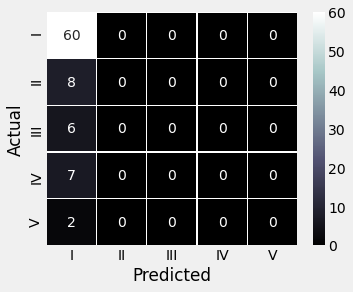

In [66]:
print('Confusion matrix:\n %s' % (confusion_matrix(test_y, pred)))
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (5,4))
cm = confusion_matrix(test_y, pred)
sns.heatmap(cm, annot=True,  fmt='g', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"],cmap=plt.cm.bone,linewidth=0.1) 
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Results comparison

In [67]:
results = pd.DataFrame([[model,train_acc, test_acc, precision, recall, f1]],
                       columns = ['Model', 'Train_Acc','Test_acc','Precision', 'Recall', 'F1_Score'])
results

Model  Train_Acc  Test_acc  Precision    Recall  F1_Score
0  MultinomialNB(alpha=1)   0.740854  0.722892   0.522572  0.722892  0.606622

In [68]:
#Lets pickle the model
pickle.dump(model,open('model_nb.pkl','wb'))

* Now that we have the results for TF-IDF only for clean_description the model result is normal.

#### Convert the categorical data using Label Encoding

In [69]:
#will create seperate Tfidf features for feature engineering 
tfidf_data = pd.DataFrame()
for i in [1,2,3]:
    tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    tf_x = tfidf.fit_transform(data['Clean_Description']).toarray()
    tf_y = pd.DataFrame(tf_x, columns=["TF_" + n for n in tfidf.get_feature_names()])
    tfidf_data = pd.concat([tfidf_data.reset_index(drop=True), tf_y.reset_index(drop=True)], axis=1)
    
tfidf_data.head(3)

TF_activity  TF_causing  TF_employee   TF_hand  TF_injury  TF_left  \
0          0.0    0.000000          0.0  0.640262   0.000000  0.00000   
1          0.0    0.000000          0.0  0.000000   0.000000  0.00000   
2          0.0    0.467071          0.0  0.487760   0.550224  0.49111   

   TF_moment  TF_operator  TF_right  TF_time  ...  \
0   0.768157          0.0       0.0      0.0  ...   
1   0.000000          0.0       0.0      0.0  ...   
2   0.000000          0.0       0.0      0.0  ...   

   TF_causing injury described  TF_described time accident  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   

   TF_finger left hand  TF_finger right hand  TF_generating described injury  \
0                  0.0                   0.0                             0.0   
1                  0.0                   0.0                             0.0   
2                  0.0                   0.0                             0.0   

   TF_hand causing injury  TF_injury time accident  TF_left hand causing  \
0                     0.0                      0.0                   0.0   
1                     0.0                      0.0                   0.0   
2                     0.0                      0.0                   0.0   

   TF_time accident employee  TF_time accident worker  
0                        0.0                      0.0  
1                        0.0                      0.0  
2                        0.0                      0.0  

[3 rows x 30 columns]

In [70]:
# Create a new DataFrame
ind_new = pd.DataFrame()
# Label encoding
ind_new['Accident_Level'] = LabelEncoder().fit_transform(data['Accident_Level']).astype(np.int8)
ind_new['Potential_Accident_Level'] = LabelEncoder().fit_transform(data['Potential_Accident_Level']).astype(np.int8)
ind_new['Country'] = LabelEncoder().fit_transform(data['Country']).astype(np.int8)
ind_new['Local'] = LabelEncoder().fit_transform(data['Local']).astype(np.int8)
ind_new['Industry_Sector'] = LabelEncoder().fit_transform(data['Industry_Sector']).astype(np.int8)
ind_new['Gender'] = LabelEncoder().fit_transform(data['Gender']).astype(np.int8)
ind_new['Employee_type'] = LabelEncoder().fit_transform(data['Employee_type']).astype(np.int8)
ind_new['Critical_Risk'] = LabelEncoder().fit_transform(data['Critical_Risk']).astype(np.int8)
ind_new.head(5)

Accident_Level  Potential_Accident_Level  Country  Local  Industry_Sector  \
0               0                         3        0      0                1   
1               0                         3        1      1                1   
2               0                         2        0      2                1   
3               0                         0        0      3                1   
4               3                         3        0      3                1   

   Gender  Employee_type  Critical_Risk  
0       1              1             20  
1       1              0             21  
2       1              2             15  
3       1              1             16  
4       1              1             16

In [71]:
# convert integers to dummy variables (i.e. one hot encoded)
from keras.utils import np_utils
dummy_y = np_utils.to_categorical(ind_new['Accident_Level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [72]:
#Create one hot encoded dummy variables
Country_dummies = pd.get_dummies(data['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(data['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(data['Gender'], columns=["Gender"], drop_first=True)
Industry_dummies = pd.get_dummies(data['Industry_Sector'], columns=['Industry_Sector'], prefix='IS', drop_first=True)
Emp_Type_dummies = pd.get_dummies(data['Employee_type'], columns=['Employee_type'], prefix='EmpType', drop_first=True)
Critical_dummies = pd.get_dummies(data['Critical_Risk'], columns=['Critical_Risk'], prefix='CR', drop_first=True)
# Merge the dataframe
ind_new = ind_new.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(Industry_dummies.reset_index(drop=True)).join(Emp_Type_dummies.reset_index(drop=True)).join(Critical_dummies.reset_index(drop=True))
ind_new = data[['Year','Month','Day']].reset_index(drop=True).join(ind_new.reset_index(drop=True))
ind_new.head(5)

Year  Month  Day  Accident_Level  Potential_Accident_Level  Country  Local  \
0  2016      1    1               0                         3        0      0   
1  2016      1    2               0                         3        1      1   
2  2016      1    6               0                         2        0      2   
3  2016      1    8               0                         0        0      3   
4  2016      1   10               3                         3        0      3   

   Industry_Sector  Gender  Employee_type  ...  CR_Projection  \
0                1       1              1  ...              0   
1                1       1              0  ...              0   
2                1       1              2  ...              0   
3                1       1              1  ...              0   
4                1       1              1  ...              0   

   CR_Projection of fragments  CR_Projection/Burning  CR_Projection/Choco  \
0                           0                      0                    0   
1                           0                      0                    0   
2                           0                      0                    0   
3                           0                      0                    0   
4                           0                      0                    0   

   CR_Projection/Manual Tools  CR_Suspended Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   
3                           0                   0           0   
4                           0                   0           0   

   CR_Vehicles and Mobile Equipment  CR_Venomous Animals  CR_remains of choco  
0                                 0                    0                    0  
1                                 0                    0                    0  
2                                 0                    0                    0  
3                                 0                    0                    0  
4                                 0                    0                    0  

[5 rows x 61 columns]

In [73]:
new_data = pd.concat([ind_new,tfidf_data],axis=1)
new_data.head(5)

Year  Month  Day  Accident_Level  Potential_Accident_Level  Country  Local  \
0  2016      1    1               0                         3        0      0   
1  2016      1    2               0                         3        1      1   
2  2016      1    6               0                         2        0      2   
3  2016      1    8               0                         0        0      3   
4  2016      1   10               3                         3        0      3   

   Industry_Sector  Gender  Employee_type  ...  TF_causing injury described  \
0                1       1              1  ...                          0.0   
1                1       1              0  ...                          0.0   
2                1       1              2  ...                          0.0   
3                1       1              1  ...                          0.0   
4                1       1              1  ...                          1.0   

   TF_described time accident  TF_finger left hand  TF_finger right hand  \
0                         0.0                  0.0                   0.0   
1                         0.0                  0.0                   0.0   
2                         0.0                  0.0                   0.0   
3                         0.0                  0.0                   0.0   
4                         0.0                  0.0                   0.0   

   TF_generating described injury  TF_hand causing injury  \
0                             0.0                0.000000   
1                             0.0                0.000000   
2                             0.0                0.000000   
3                             0.0                0.688933   
4                             0.0                0.000000   

   TF_injury time accident  TF_left hand causing  TF_time accident employee  \
0                      0.0              0.000000                        0.0   
1                      0.0              0.000000                        0.0   
2                      0.0              0.000000                        0.0   
3                      0.0              0.724825                        0.0   
4                      0.0              0.000000                        0.0   

   TF_time accident worker  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 91 columns]

In [74]:
#Columns
new_data.columns

Index(['Year', 'Month', 'Day', 'Accident_Level', 'Potential_Accident_Level',
       'Country', 'Local', 'Industry_Sector', 'Gender', 'Employee_type',
       'Critical_Risk', 'Country_02', 'Country_03', 'Local_02', 'Local_03',
       'Local_04', 'Local_05', 'Local_06', 'Local_07', 'Local_08', 'Local_09',
       'Local_10', 'Local_11', 'Local_12', 'Male', 'IS_Mining', 'IS_Others',
       'EmpType_Third Party', 'EmpType_Third Party (Remote)', 'CR_Bees',
       'CR_Blocking and isolation of energies', 'CR_Burn',
       'CR_Chemical substances', 'CR_Confined space', 'CR_Cut',
       'CR_Electrical Shock', 'CR_Electrical installation', 'CR_Fall',
       'CR_Fall prevention', 'CR_Fall prevention (same level)',
       'CR_Individual protection equipment', 'CR_Liquid Metal',
       'CR_Machine Protection', 'CR_Manual Tools', 'CR_Others', 'CR_Plates',
       'CR_Poll', 'CR_Power lock', 'CR_Pressed', 'CR_Pressurized Systems',
       'CR_Pressurized Systems / Chemical Substances', 'CR_Projection',

In [75]:
#Check for missing values
new_data.isnull().sum()

Year                         0
Month                        0
Day                          0
Accident_Level               0
Potential_Accident_Level     0
                            ..
TF_hand causing injury       0
TF_injury time accident      0
TF_left hand causing         0
TF_time accident employee    0
TF_time accident worker      0
Length: 91, dtype: int64

#### Save & re-run the file

In [76]:
# new_data.to_csv('new_ind_saf.csv',index=False, encoding='utf_8_sig')
pickle.dump(new_data,open('model_data.pkl','wb'))
# new_data = pickle.load(open('model_data.pkl','rb'))

In [77]:
import pickle
new_data = pickle.load(open('model_data.pkl','rb'))

#### Model Train-Test split

In [78]:
#Split the data
X = new_data.drop(['Accident_Level','Potential_Accident_Level'], axis = 1) # Considering all Predictors
y = new_data['Accident_Level']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X,dummy_y,test_size=0.20, random_state=1,stratify=y)
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(328, 89) (328,) (83, 89) (83,)


### Model Building with ML algorithms

#### Creating a function for different ML models

In [80]:
# Creating a function for different ml models
def ml_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None,DL_model=False):
    # train the model
    clf = estimator 
    if DL_model :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the clasifier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    #metrics   
    print('Estimator:', clf)
    print('='*60)
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*60)
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %f' % precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %f' % recall)
    f1_score = f1_score(y_test, y_pred, average='weighted')
    print('F1 score: %f' % f1_score)
    print('='*60)    
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*60)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print('='*60)
    #confusion matrix visualization
    plt.figure(figsize = (5,4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True,  fmt='g', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"],cmap=plt.cm.bone,linewidth=0.1) 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### Multinomial Naive Bayes

Estimator: MultinomialNB()
Training accuracy: 71.34%
Testing accuracy: 66.27%
Precision: 0.552690
Recall: 0.662651
F1 score: 0.602667
Confusion matrix:
 [[54  1  1  5  0]
 [ 7  0  0  1  0]
 [ 6  0  0  0  0]
 [ 5  0  0  1  0]
 [ 1  0  0  1  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         2

    accuracy                           0.66        83
   macro avg       0.17      0.21      0.19        83
weighted avg       0.55      0.66      0.60        83



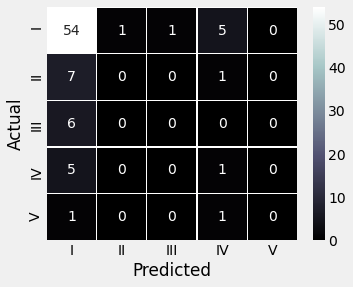

In [81]:
ml_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

#### KNN

Estimator: KNeighborsClassifier()
Training accuracy: 74.09%
Testing accuracy: 72.29%
Precision: 0.537761
Recall: 0.722892
F1 score: 0.616733
Confusion matrix:
 [[60  1  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 6  0  0  0  0]
 [ 2  0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83



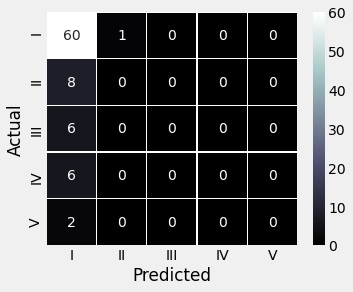

In [82]:
ml_classification(KNeighborsClassifier( ), X_train, X_test, y_train, y_test)

#### SVC-Linear

Estimator: LinearSVC()
Training accuracy: 73.78%
Testing accuracy: 73.49%
Precision: 0.540136
Recall: 0.734940
F1 score: 0.622657
Confusion matrix:
 [[61  0  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 6  0  0  0  0]
 [ 2  0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83



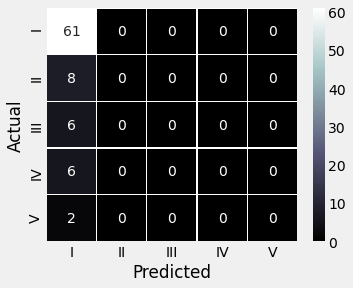

In [83]:
ml_classification(LinearSVC(), X_train, X_test, y_train, y_test)

#### SVC-rbf

Estimator: SVC()
Training accuracy: 73.78%
Testing accuracy: 73.49%
Precision: 0.540136
Recall: 0.734940
F1 score: 0.622657
Confusion matrix:
 [[61  0  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 6  0  0  0  0]
 [ 2  0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83



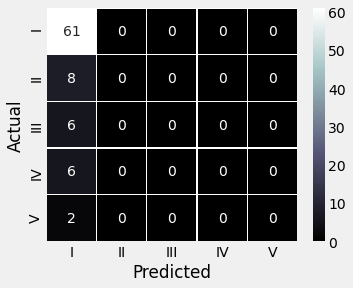

In [84]:
ml_classification(SVC(kernel = 'rbf'), X_train, X_test, y_train, y_test)

#### Decision-Tree

Estimator: DecisionTreeClassifier(random_state=1)
Training accuracy: 99.70%
Testing accuracy: 62.65%
Precision: 0.585820
Recall: 0.626506
F1 score: 0.604461
Confusion matrix:
 [[50  4  3  3  1]
 [ 8  0  0  0  0]
 [ 4  0  0  1  1]
 [ 3  0  1  1  1]
 [ 0  1  0  0  1]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.20      0.17      0.18         6
           4       0.25      0.50      0.33         2

    accuracy                           0.63        83
   macro avg       0.24      0.30      0.26        83
weighted avg       0.59      0.63      0.60        83



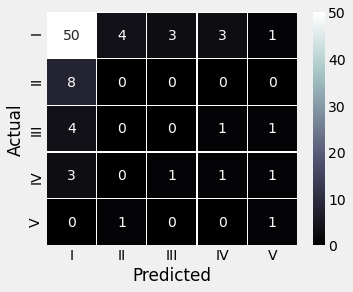

In [85]:
ml_classification(DecisionTreeClassifier(criterion = 'gini', random_state=1), X_train, X_test, y_train, y_test)

#### Random Forest

Estimator: RandomForestClassifier()
Training accuracy: 99.70%
Testing accuracy: 73.49%
Precision: 0.540136
Recall: 0.734940
F1 score: 0.622657
Confusion matrix:
 [[61  0  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 6  0  0  0  0]
 [ 2  0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83



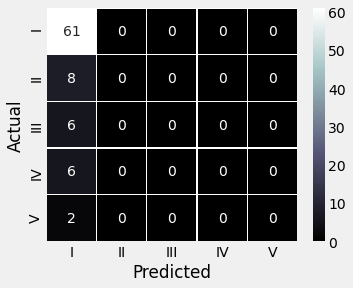

In [86]:
ml_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

#### Bagging classifier

Estimator: BaggingClassifier(max_samples=0.75, n_estimators=30, oob_score=True,
                  random_state=1)
Training accuracy: 97.56%
Testing accuracy: 72.29%
Precision: 0.544400
Recall: 0.722892
F1 score: 0.621076
Confusion matrix:
 [[60  1  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 6  0  0  0  0]
 [ 1  1  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.85        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83



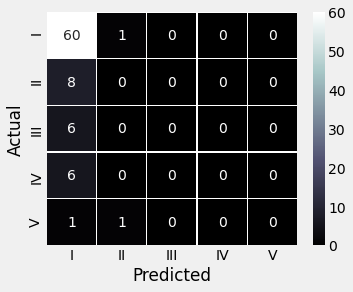

In [87]:
ml_classification(BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True), X_train, X_test, y_train, y_test)

#### ExtraTreesClassifier

Estimator: ExtraTreesClassifier(bootstrap=True, criterion='entropy', n_estimators=50,
                     oob_score=True)
Training accuracy: 99.70%
Testing accuracy: 69.88%
Precision: 0.532831
Recall: 0.698795
F1 score: 0.604631
Confusion matrix:
 [[58  3  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 6  0  0  0  0]
 [ 2  0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        83
   macro avg       0.14      0.19      0.16        83
weighted avg       0.53      0.70      0.60        83



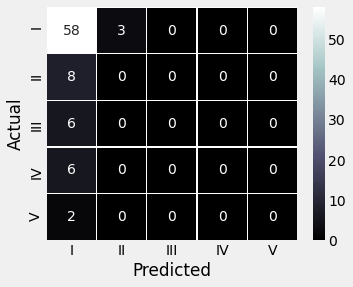

In [88]:
ml_classification(ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True), X_train, X_test, y_train, y_test)

#### Adaboost Classifier

Estimator: AdaBoostClassifier(learning_rate=0.25, n_estimators=100, random_state=1)
Training accuracy: 73.78%
Testing accuracy: 71.08%
Precision: 0.571663
Recall: 0.710843
F1 score: 0.632233
Confusion matrix:
 [[58  1  0  1  1]
 [ 7  0  0  1  0]
 [ 6  0  0  0  0]
 [ 5  0  0  1  0]
 [ 1  0  0  1  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        83
   macro avg       0.20      0.22      0.21        83
weighted avg       0.57      0.71      0.63        83



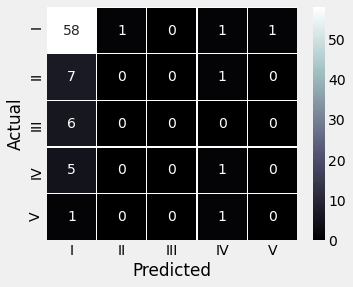

In [89]:
ml_classification(AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1), X_train, X_test, y_train, y_test)

#### GBM

Estimator: GradientBoostingClassifier(n_estimators=50, random_state=1,
                           validation_fraction=0.2)
Training accuracy: 94.82%
Testing accuracy: 71.08%
Precision: 0.561623
Recall: 0.710843
F1 score: 0.627414
Confusion matrix:
 [[58  0  1  1  1]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 4  0  1  0  1]
 [ 1  0  0  0  1]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.33      0.50      0.40         2

    accuracy                           0.71        83
   macro avg       0.22      0.29      0.25        83
weighted avg       0.56      0.71      0.63        83



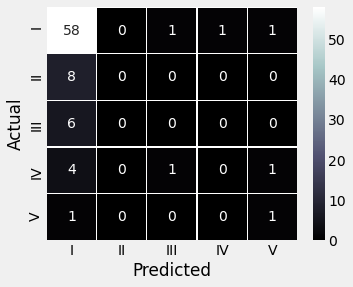

In [90]:
ml_classification(GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1), X_train, X_test, y_train, y_test)

#### XGBoost

[11:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Training accuracy: 83.54%
Testing accuracy: 72.29%
Prec

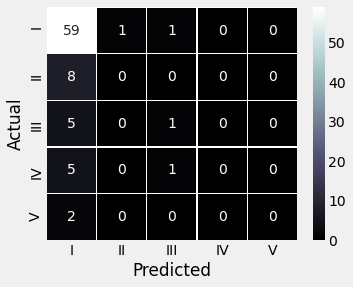

In [91]:
ml_classification(XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5), X_train, X_test, y_train, y_test)

#### LGBM

Estimator: LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=1)
Training accuracy: 99.70%
Testing accuracy: 68.67%
Precision: 0.537071
Recall: 0.686747
F1 score: 0.602756
Confusion matrix:
 [[57  3  1  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 5  0  1  0  0]
 [ 2  0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.15      0.19      0.16        83
weighted avg       0.54      0.69      0.60        83



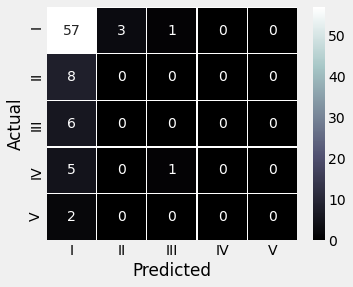

In [92]:
ml_classification(LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass"), X_train, X_test, y_train, y_test)

#### Observation:
* From the above ML models we can say SVC and Adaboost models have performed well & remaing models were overfitting.

In [93]:
#Pickle and check for prediction
from sklearn.svm import SVC 
# classifier = SVC(kernel='linear')
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.25, n_estimators=100, random_state=1)

In [94]:
# Predicting Test Set
y_pred = model.predict(X_test)

In [95]:
# Evaluating Results
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test, y_pred)
print(f"Train Set Accuracy : {(accuracy_score(y_train, model.predict(X_train))* 100):.4f} %")
print(f"Test Set Accuracy : {(acc* 100):.4f} %")
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
f1_score = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1_score)

Train Set Accuracy : 73.7805 %
Test Set Accuracy : 71.0843 %
Precision: 0.571663
Recall: 0.710843
F1 score: 0.632233


In [96]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        83
   macro avg       0.20      0.22      0.21        83
weighted avg       0.57      0.71      0.63        83



In [114]:
#Crossvalidate the model svc,adaboost
# loading libraries
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

# Generating features matrix and target vector
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 42)

# Creating model
model = SVC(kernel='linear')
# model = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)

# Cross-validate model using accuracy
print(); print(cross_val_score(model, X, y, scoring="f1", cv = 7))
mean_score = cross_val_score(model, X, y, scoring="f1", cv = 7).mean()
std_score = cross_val_score(model, X, y, scoring="f1", cv = 7).std()
print('F1_score:'); print(mean_score)
print('F1_score:'); print(std_score)


[0.88966971 0.85352113 0.89280677 0.87464387 0.85917496 0.8591954
 0.86858749]
F1_score:
0.8710856201903144
F1_score:
0.014282012021445618


In [116]:
# #Pickle the models
import pickle
pickle.dump(model,open('model_svc.pkl', 'wb'))
# # pickle.dump(model,open('model_ab.pkl', 'wb'))
# # load the model from disk
# # loaded_model = pickle.load(open('model_svc.pkl', 'rb'))

#### ML_Model comparison

In [98]:
# Creating a function for different ml models
def ml_models(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    # Fit the model
    if method == 'Logistic' or method == 'GradientBoosting':
        model.fit(X_train, y_train)  
    else:
        model.fit(X_train, y_train)  
    # Predict on Test data
    y_pred = model.predict(X_test)
    #evaluation results
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    model_class = classification_report(y_test, y_pred)

    # Creating a dataframe for tabular form
    results = pd.DataFrame({'ML_Model': method, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 
                              'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}, index=[index])
    
    # return all predictions  
    return results  

In [99]:
# Function for different models
def train_test_models(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['Logistic',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['NB Classifier',MultinomialNB( )],
        ['KNN',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTree',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForest',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoost',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoosting',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)]]
    results_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_results = ml_models(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'none', 'none')

        # Store the accuracy results for each model in a dataframe for comparison
        results_common = pd.concat([results_common, reg_results])
        i = i+1

    return results_common

#### Algorithm Performance Comparison in Tabular form

In [100]:
# Train and Test all models 
train_test_models(X_train, X_test, y_train, y_test,'none')

ML_Model  Train Accuracy  Test Accuracy  Precision    Recall  \
1               Logistic        0.737805       0.734940   0.540136  0.734940   
2          NB Classifier        0.713415       0.662651   0.552690  0.662651   
3                    KNN        0.765244       0.710843   0.535326  0.710843   
4                    SVC        0.737805       0.734940   0.540136  0.734940   
5           DecisionTree        0.996951       0.626506   0.585820  0.626506   
6           RandomForest        0.957317       0.698795   0.546494  0.698795   
7      BaggingClassifier        0.975610       0.722892   0.544400  0.722892   
8   ExtraTreesClassifier        0.996951       0.710843   0.535326  0.710843   
9               AdaBoost        0.737805       0.710843   0.571663  0.710843   
10      GradientBoosting        0.948171       0.710843   0.561623  0.710843   

    F1-Score  
1   0.622657  
2   0.602667  
3   0.610725  
4   0.622657  
5   0.604461  
6   0.613331  
7   0.621076  
8   0.610725  
9   0.632233  
10  0.627414

* From the above model comparison we can say SVC and Adaboost models have performed well remaing models were overfitting.

#### Hyperparameter tuning

In [101]:
#SVC gridsearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf_svc = SVC(probability=True, kernel='linear', C=7)
param_grid = {'kernel':('linear','rbf'),
             'C': [0.1,1,10,100],
             'gamma' :('scale','auto')}

grid_search = GridSearchCV(clf_svc, param_grid=param_grid, cv=cv)
grid_search.fit(X_train, y_train)
print("Best F1_Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best F1_Score: 0.737879 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [102]:
hyp_results = pd.DataFrame([[clf_svc,grid_search.best_score_]],
                       columns = ['Model', 'Score'])
hyp_results

Model     Score
0  SVC(C=7, kernel='linear', probability=True)  0.737879

In [103]:
#KNN
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_grid = {
    'n_neighbors': [2, 3, 5,10,15,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}
clf_knn = KNeighborsClassifier()
grid_search = GridSearchCV(clf_knn, param_grid, cv=cv)
grid_search.fit(X_train, y_train)
print("Best F1_Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best F1_Score: 0.737879 using {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}


In [104]:
hyp_results1 = pd.DataFrame([[clf_knn,grid_search.best_score_]],
                       columns = ['Model', 'Score'])
hyp_results =hyp_results.append(hyp_results1,ignore_index = True)
hyp_results

Model     Score
0  SVC(C=7, kernel='linear', probability=True)  0.737879
1                       KNeighborsClassifier()  0.737879

In [105]:
#Random Forest
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_grid = {
    'n_estimators': [10, 20, 30, 100],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf_rf, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best F1_Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best F1_Score: 0.734807 using {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}


In [106]:
hyp_results2 = pd.DataFrame([[clf_rf,grid_search.best_score_]],
                       columns = ['Model', 'Score'])
hyp_results =hyp_results.append(hyp_results2,ignore_index = True)
hyp_results

Model     Score
0  SVC(C=7, kernel='linear', probability=True)  0.737879
1                       KNeighborsClassifier()  0.737879
2       RandomForestClassifier(random_state=0)  0.734807

In [107]:
#LR
clf_lr = lr = LogisticRegression()
param_grid = {'C': [0.1,1,10,100],
              'class_weight':(None, 'balanced')}
grid_search = GridSearchCV(clf_lr, param_grid=param_grid, cv=5)
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'class_weight': None}
0.7372318542462531


In [108]:
hyp_results3 = pd.DataFrame([[clf_lr,grid_search.best_score_]],
                       columns = ['Model', 'Score'])
hyp_results =hyp_results.append(hyp_results3,ignore_index = True)
hyp_results

Model     Score
0  SVC(C=7, kernel='linear', probability=True)  0.737879
1                       KNeighborsClassifier()  0.737879
2       RandomForestClassifier(random_state=0)  0.734807
3                         LogisticRegression()  0.737232

In [109]:
#Adaboost
clf_adb = AdaBoostClassifier()
param_grid = {'n_estimators': np.arange(30,100,10),
              'learning_rate': np.arange(0.1,1,0.5)}
grid_search = GridSearchCV(clf_adb, param_grid=param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.6, 'n_estimators': 50}
0.7177615571776155


In [110]:
hyp_results4 = pd.DataFrame([[clf_adb,grid_search.best_score_]],
                       columns = ['Model', 'Score'])
hyp_results =hyp_results.append(hyp_results4,ignore_index = True)
hyp_results

Model     Score
0  SVC(C=7, kernel='linear', probability=True)  0.737879
1                       KNeighborsClassifier()  0.737879
2       RandomForestClassifier(random_state=0)  0.734807
3                         LogisticRegression()  0.737232
4                         AdaBoostClassifier()  0.717762

In [111]:
#GBM
clf_gbc = GradientBoostingClassifier(n_estimators=100, max_features=8)

param_grid = {'n_estimators': [10, 50, 100, 500],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'subsample':[0.5, 0.7, 1.0],
              'max_depth': [3, 7, 9]}
grid_search = GridSearchCV(clf_gbc, param_grid=param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.7372262773722628


In [112]:
hyp_results5 = pd.DataFrame([[clf_gbc,grid_search.best_score_]],
                       columns = ['Model', 'Score'])
hyp_results =hyp_results.append(hyp_results5,ignore_index = True)
hyp_results

Model     Score
0  SVC(C=7, kernel='linear', probability=True)  0.737879
1                       KNeighborsClassifier()  0.737879
2       RandomForestClassifier(random_state=0)  0.734807
3                         LogisticRegression()  0.737232
4                         AdaBoostClassifier()  0.717762
5   GradientBoostingClassifier(max_features=8)  0.737226

In [113]:
#Pickle
pickle.dump(clf_gbc,open('model_gbc_cv.pkl','wb'))
pickle.dump(clf_svc,open('model_svc_cv.pkl','wb'))

* From Hyperparameter tuning we can observe SVC and GBM have better performance.

#### Sampling/SMOTE techniques for Imbalanced data

* Apply Smote techniques to avoid class imbalance

In [101]:
# Level_Count
new_data['Accident_Level'].value_counts()

0    303
1     39
2     31
3     30
4      8
Name: Accident_Level, dtype: int64

In [102]:
#Only smote 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_sm), pd.DataFrame(y_train_sm)], axis=1)

In [103]:
# Split target
X_train_sm = df_smote.iloc[:,:-1] 
y_train_sm = df_smote.iloc[:,-1:]

In [104]:
# Display new accident level counts
y_train_sm['Accident_Level'].value_counts()

0    242
1    242
2    242
3    242
4    242
Name: Accident_Level, dtype: int64

In [106]:
y_train_sm_dummy = np_utils.to_categorical(y_train_sm['Accident_Level'])
y_train_sm_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

#### Model Building on Smote-data

#### Multinomial NB

Estimator: MultinomialNB()
Training accuracy: 61.49%
Testing accuracy: 32.53%
Precision: 0.629750
Recall: 0.325301
F1 score: 0.394177
Confusion matrix:
 [[20 12  3 17  9]
 [ 2  2  1  2  1]
 [ 2  0  2  0  2]
 [ 1  1  1  2  1]
 [ 0  0  0  1  1]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.33      0.47        61
           1       0.13      0.25      0.17         8
           2       0.29      0.33      0.31         6
           3       0.09      0.33      0.14         6
           4       0.07      0.50      0.12         2

    accuracy                           0.33        83
   macro avg       0.28      0.35      0.24        83
weighted avg       0.63      0.33      0.39        83



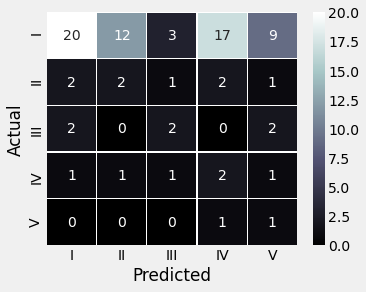

In [109]:
ml_classification(MultinomialNB(), X_train_sm, X_test, y_train_sm, y_test)

#### Adaboost

Estimator: AdaBoostClassifier(learning_rate=0.25, n_estimators=100, random_state=1)
Training accuracy: 40.58%
Testing accuracy: 69.88%
Precision: 0.563253
Recall: 0.698795
F1 score: 0.623604
Confusion matrix:
 [[57  1  0  3  0]
 [ 7  0  0  1  0]
 [ 5  0  0  1  0]
 [ 5  0  0  1  0]
 [ 2  0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        61
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.17      0.17      0.17         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        83
   macro avg       0.18      0.22      0.20        83
weighted avg       0.56      0.70      0.62        83



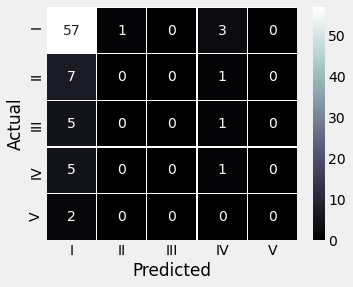

In [110]:
ml_classification(AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1),  X_train_sm, X_test, y_train_sm, y_test)

#### Xgboost

[17:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Training accuracy: 98.51%
Testing accuracy: 63.86%
Prec

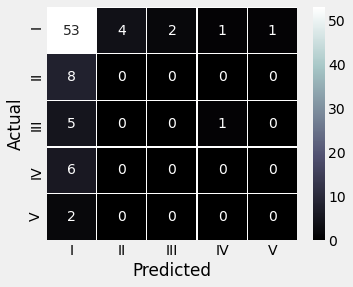

In [111]:
ml_classification(XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5),  X_train_sm, X_test, y_train_sm, y_test)

#### Model comparison

In [113]:
#Try on all ml models
train_test_models( X_train_sm, X_test, y_train_sm, y_test,'none')

ML_Model  Train Accuracy  Test Accuracy  Precision    Recall  \
1               Logistic        0.428099       0.204819   0.526701  0.204819   
2          NB Classifier        0.614876       0.325301   0.629750  0.325301   
3                    KNN        0.912397       0.313253   0.600247  0.313253   
4                    SVC        0.317355       0.108434   0.399846  0.108434   
5           DecisionTree        0.999174       0.518072   0.586654  0.518072   
6           RandomForest        0.996694       0.590361   0.536163  0.590361   
7      BaggingClassifier        0.997521       0.602410   0.553558  0.602410   
8   ExtraTreesClassifier        0.999174       0.626506   0.523519  0.626506   
9               AdaBoost        0.405785       0.698795   0.563253  0.698795   
10      GradientBoosting        0.966116       0.590361   0.537493  0.590361   

    F1-Score  
1   0.242272  
2   0.394177  
3   0.399090  
4   0.064410  
5   0.549182  
6   0.561914  
7   0.576458  
8   0.570401  
9   0.623604  
10  0.562688

* By comparing the performance from above models most of the models are over/underfitting using smote techniques.

#### Sampling techniques- Oversamppling & Undersampling

In [114]:
# Level_Count
new_data['Accident_Level'].value_counts()

0    303
1     39
2     31
3     30
4      8
Name: Accident_Level, dtype: int64

In [115]:
# OverSampling
from imblearn.over_sampling import RandomOverSampler
# defining the Model
ros = RandomOverSampler(random_state=1)
# Training the Model
ros.fit(X, y)
# Creating the Resampled Sets
X_resampled, y_resampled = ros.fit_sample(X, y)

In [116]:
# Lets Check the Class Distribution
y_resampled.value_counts()

0    303
1    303
2    303
3    303
4    303
Name: Accident_Level, dtype: int64

In [117]:
# Splitting the dataset
X_train_re, X_test_re, y_train_re, y_test_re =train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=1)
# lets print the shapes
print("The Shape of X train :", X_train_re.shape)
print("The Shape of X test :", X_test_re.shape)
print("The Shape of Y train :", y_train_re.shape)
print("The Shape of Y test :", y_test_re.shape)

The Shape of X train : (1212, 89)
The Shape of X test : (303, 89)
The Shape of Y train : (1212,)
The Shape of Y test : (303,)


#### Model Building on Smote-data

#### Multinomial NB

Estimator: MultinomialNB()
Training accuracy: 54.87%
Testing accuracy: 48.84%
Precision: 0.504087
Recall: 0.488449
F1 score: 0.476701
Confusion matrix:
 [[14  9 13  9 11]
 [ 6 26 20 10  9]
 [ 7  2 36 10 12]
 [16  0  3 27  7]
 [ 0  0 11  0 45]]
Classification report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.28        56
           1       0.70      0.37      0.48        71
           2       0.43      0.54      0.48        67
           3       0.48      0.51      0.50        53
           4       0.54      0.80      0.64        56

    accuracy                           0.49       303
   macro avg       0.50      0.49      0.48       303
weighted avg       0.50      0.49      0.48       303



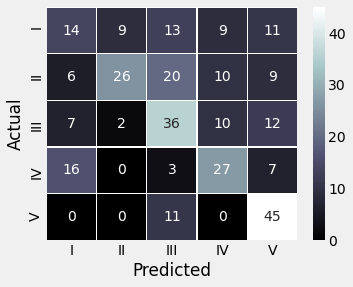

In [118]:
ml_classification(MultinomialNB(), X_train_re, X_test_re, y_train_re, y_test_re)

In [119]:
train_test_models(X_train_re, X_test_re, y_train_re, y_test_re,'none')

ML_Model  Train Accuracy  Test Accuracy  Precision    Recall  \
1               Logistic        0.316832       0.303630   0.318019  0.303630   
2          NB Classifier        0.548680       0.488449   0.504087  0.488449   
3                    KNN        0.939769       0.900990   0.908142  0.900990   
4                    SVC        0.206271       0.174917   0.030596  0.174917   
5           DecisionTree        1.000000       0.933993   0.941305  0.933993   
6           RandomForest        1.000000       0.966997   0.968747  0.966997   
7      BaggingClassifier        0.999175       0.953795   0.956595  0.953795   
8   ExtraTreesClassifier        1.000000       0.966997   0.968423  0.966997   
9               AdaBoost        0.372937       0.359736   0.468596  0.359736   
10      GradientBoosting        0.958746       0.910891   0.909466  0.910891   

    F1-Score  
1   0.295945  
2   0.476701  
3   0.887370  
4   0.052082  
5   0.928769  
6   0.965829  
7   0.951219  
8   0.965744  
9   0.347670  
10  0.909455

* We can see that ML models are overfitted and giving poor results other than KNN,BC alg while applying sampling tecchinques.

### Model building with Deep learning Algorithms 

* we will create a neural networks classification model that uses all categorical columns which are  one-hot encoded columns and tf-idf features for predictions.

#### Model build using NN classifiers(Target)

In [128]:
#Ann Model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) 

optimizer = SGD(lr=0.001, momentum=0.9)
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Use earlystopping
callback = EarlyStopping(monitor='val_loss',mode='min', verbose=0,patience=3)

# fit the model
training = model.fit(X_train, y_train_dummy, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=callback)

Epoch 1/50
41/41 [==============================] - 1s 5ms/step - loss: 2.0313 - categorical_accuracy: 0.1860 - val_loss: 1.3078 - val_categorical_accuracy: 0.7349
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 1.5721 - categorical_accuracy: 0.2927 - val_loss: 1.1209 - val_categorical_accuracy: 0.7349
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 1.3645 - categorical_accuracy: 0.5610 - val_loss: 1.0131 - val_categorical_accuracy: 0.7349
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 1.2422 - categorical_accuracy: 0.6372 - val_loss: 0.9860 - val_categorical_accuracy: 0.7349
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 1.1881 - categorical_accuracy: 0.6677 - val_loss: 0.9838 - val_categorical_accuracy: 0.7349
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 1.0802 - categorical_accuracy: 0.6890 - val_loss: 0.9620 - val_categorical_accuracy: 0.7349
Epoch 7/50
41/41

In [129]:
# Evaluate the model
_, train_accuracy = model.evaluate(X_train, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)
print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.78
Test accuracy: 73.49


In [130]:
#Evaluation
def model_evaluation(model,X_test,y_test_dummy):
    score = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return score
model_evaluation(model,X_test,y_test_dummy)

Test loss: 0.9268819093704224 / Test accuracy: 0.7349397540092468


[0.9268819093704224, 0.7349397540092468]

In [146]:
def performance_report(model,X_test,y_test_dummy):
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    predict_x=model.predict(X_test)
   
    classes_x=np.argmax(predict_x,axis=1)
    
    y_test=np.argmax(y_test_dummy, axis=1)
    accuracy = accuracy_score(y_test,classes_x)

    precision = precision_score(y_test, classes_x,average='micro')
    
    recall = recall_score(y_test, classes_x,average='micro')
  
    f1 = f1_score(y_test, classes_x,average='micro')
    return accuracy, precision, recall, f1

In [147]:
#Results
accuracy, precision, recall, f1 = performance_report(model,X_test,y_test_dummy)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.734940
Precision: 0.734940
Recall: 0.734940
F1 score: 0.734940


In [148]:
cm = confusion_matrix(y_test,classes_x)
print(cm)

[[61  0  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 6  0  0  0  0]
 [ 2  0  0  0  0]]


Text(0.5, 1.0, 'Training & validation loss')

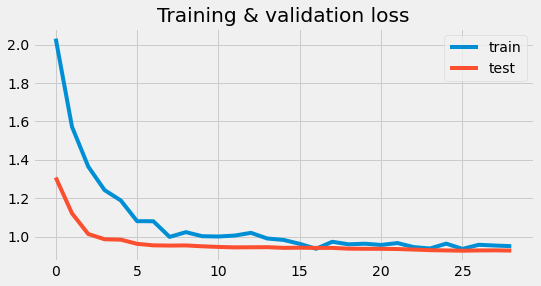

In [135]:
# Visualize loss curves
epochs = range(len(training.history['loss']))
plt.figure(figsize = (8,4))
plt.plot(epochs, training.history['loss'], label = 'train')
plt.plot(epochs, training.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training & validation loss')

Text(0.5, 1.0, 'Training & validation accuracy')

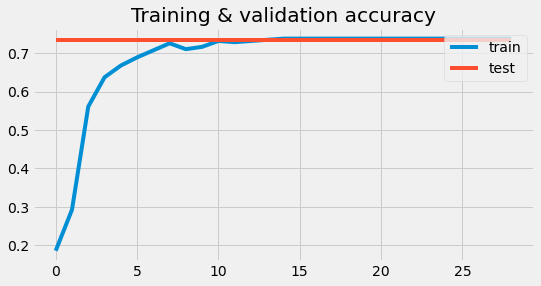

In [136]:
# plot accuracy curves
plt.figure(figsize = (8,4))
plt.plot(epochs, training.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training & validation accuracy')

* Above model is a good fit, training and validation loss at a point have a minimal gap between the two final loss values.

In [149]:
# Pickle the model
# Store the model as json and weights as HDF5
model_json = model.to_json()
with open("model_dl.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model_dl.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("model_dl.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


#### Model building with SMOTE data

* Model build on Smote data

In [122]:
# model
model = Sequential()
model.add(Dense(10, input_dim=X_train_sm.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) 
# compile the model
model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Use earlystopping
callback = EarlyStopping(monitor='val_loss',mode='min', verbose=0,patience=3)

# fit the model
training_history_smote = model.fit(X_train_sm, y_train_sm_dummy, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=callback)

Epoch 1/50
152/152 [==============================] - 1s 2ms/step - loss: 1.9916 - categorical_accuracy: 0.1884 - val_loss: 1.6522 - val_categorical_accuracy: 0.0723
Epoch 2/50
152/152 [==============================] - 0s 1ms/step - loss: 1.7771 - categorical_accuracy: 0.2033 - val_loss: 1.5442 - val_categorical_accuracy: 0.0964
Epoch 3/50
152/152 [==============================] - 0s 1ms/step - loss: 1.7149 - categorical_accuracy: 0.1942 - val_loss: 1.5356 - val_categorical_accuracy: 0.0964
Epoch 4/50
152/152 [==============================] - 0s 1ms/step - loss: 1.6805 - categorical_accuracy: 0.2033 - val_loss: 1.5189 - val_categorical_accuracy: 0.0964
Epoch 5/50
152/152 [==============================] - 0s 1ms/step - loss: 1.6779 - categorical_accuracy: 0.1926 - val_loss: 1.5358 - val_categorical_accuracy: 0.0964
Epoch 6/50
152/152 [==============================] - 0s 1ms/step - loss: 1.6497 - categorical_accuracy: 0.1959 - val_loss: 1.5505 - val_categorical_accuracy: 0.0964
Epoc

In [123]:
# Evaluate the model
_, train_accuracy = model.evaluate(X_train_sm, y_train_sm_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)
print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 20.00
Test accuracy: 9.64


In [125]:
# #Evaluation
def model_evaluation(model,X_test,y_test_dummy):
    score = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return score
model_evaluation(model,X_test,y_test_dummy)

Test loss: 1.5498929023742676 / Test accuracy: 0.09638553857803345


[1.5498929023742676, 0.09638553857803345]

Text(0.5, 1.0, 'Training and validation loss')

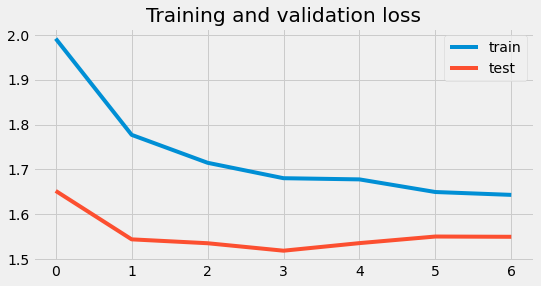

In [126]:
# Visualize loss curves
epochs = range(len(training_history_smote.history['loss']))
plt.figure(figsize = (8,4))
plt.plot(epochs, training_history_smote.history['loss'], label = 'train')
plt.plot(epochs, training_history_smote.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

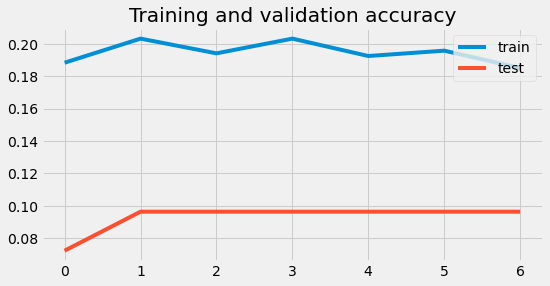

In [127]:
# plot accuracy curves
plt.figure(figsize = (8,4))
plt.plot(epochs, training_history_smote.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history_smote.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

* Model results were poor for smote techinques when applying NN classifier.

#### Model building with RNN & LSTM classifier

In [128]:
# Model
max_features = 5000
embedding_size = 256
model = Sequential()
model.add(Embedding(max_features, embedding_size,input_length = X_train.shape[1]))
model.add(LSTM(512,dropout=0.2,recurrent_dropout=0.2,return_sequences=True))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Use earlystopping
callback = EarlyStopping(monitor='val_loss',mode='min', verbose=0,patience=3)

# fit the model
model_lstm = model.fit(X_train, y_train_dummy, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=callback)

Epoch 1/50
41/41 [==============================] - 70s 2s/step - loss: 1.2093 - categorical_accuracy: 0.6921 - val_loss: 0.9764 - val_categorical_accuracy: 0.7349
Epoch 2/50
41/41 [==============================] - 69s 2s/step - loss: 1.0080 - categorical_accuracy: 0.7378 - val_loss: 1.1494 - val_categorical_accuracy: 0.7349
Epoch 3/50
41/41 [==============================] - 70s 2s/step - loss: 0.9789 - categorical_accuracy: 0.7287 - val_loss: 1.0286 - val_categorical_accuracy: 0.7349
Epoch 4/50
41/41 [==============================] - 70s 2s/step - loss: 0.9934 - categorical_accuracy: 0.7378 - val_loss: 0.9022 - val_categorical_accuracy: 0.7349
Epoch 5/50
41/41 [==============================] - 69s 2s/step - loss: 0.9095 - categorical_accuracy: 0.7348 - val_loss: 0.9222 - val_categorical_accuracy: 0.7349
Epoch 6/50
41/41 [==============================] - 69s 2s/step - loss: 0.8831 - categorical_accuracy: 0.7470 - val_loss: 0.8815 - val_categorical_accuracy: 0.7349
Epoch 7/50
41/41

In [129]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 89, 256)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 89, 512)           1574912   
_________________________________________________________________
flatten (Flatten)            (None, 45568)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               11665664  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [130]:
# Evaluate the model
_, train_accuracy = model.evaluate(X_train, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 76.83
Test accuracy: 73.49


In [131]:
#Evaluation
def model_evaluation(model,X_test,y_test_dummy):
    score = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return score
model_evaluation(model,X_test,y_test_dummy)

Test loss: 0.9251990914344788 / Test accuracy: 0.7349397540092468


[0.9251990914344788, 0.7349397540092468]

In [133]:
#Results
def performance_report(model,X_test,y_test_dummy):
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    predict_x=model.predict(X_test)
   
    classes_x=np.argmax(predict_x,axis=1)
    
    y_test=np.argmax(y_test_dummy, axis=1)
    accuracy = accuracy_score(y_test,classes_x)

    precision = precision_score(y_test, classes_x,average='micro')
    
    recall = recall_score(y_test, classes_x,average='micro')
  
    f1 = f1_score(y_test, classes_x,average='micro')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = performance_report(model,X_test,y_test_dummy)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.734940
Precision: 0.734940
Recall: 0.734940
F1 score: 0.734940


Text(0.5, 1.0, 'Training and validation loss')

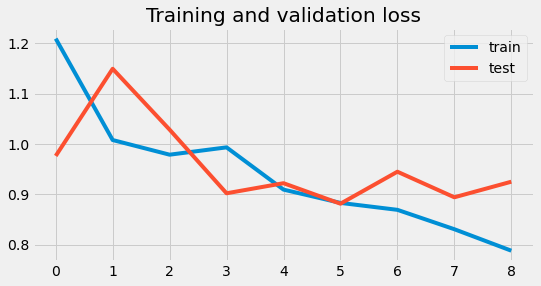

In [138]:
# Visualize loss curves
epochs = range(len(model_lstm.history['loss']))
plt.figure(figsize = (8,4))
plt.plot(epochs,model_lstm.history['loss'], label = 'train')
plt.plot(epochs,model_lstm.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

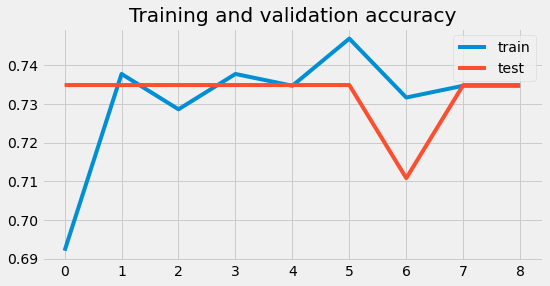

In [139]:
# plot accuracy curves
plt.figure(figsize = (8,4))
plt.plot(epochs,model_lstm.history['categorical_accuracy'], label = 'train')
plt.plot(epochs,model_lstm.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title('Training and validation accuracy')

In [142]:
# Pickle the model
# serialize model to JSON
model_json = model.to_json()
with open("dl_model_lstm.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("dl_model_lstm.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("dl_model_lstm.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


* We can observe accuracy rise during training as the learning curves for accuracy on the test data, indicating that model has not much overfit along the training data.

#### Create model with text data with word embeddings

#### Data Preperation
#### Sequence Data Transformation :
   - Text Tokenization
   - Text sequence generation
   - Pad the text sequence data

In [162]:
# Select features
X_text_data = data['Clean_Description']
y_text_data = data['Accident_Level']
# Label encode column 'Accident_Level'.
y_text_data = LabelEncoder().fit_transform(y_text_data)

In [163]:
# Divide our data into testing and training sets:
X_text_data_train, X_text_data_test, y_text_data_train, y_text_data_test = train_test_split(X_text_data, y_text_data, test_size = 0.20, random_state = 1, stratify = y_text_data)
print('X_text_data_train shape : ({0})'.format(X_text_data_train.shape[0]))
print('y_text_data_train shape : ({0},)'.format(y_text_data_train.shape[0]))
print('X_text_data_test shape : ({0})'.format(X_text_data_test.shape[0]))
print('y_text_data_test shape : ({0},)'.format(y_text_data_test.shape[0]))

X_text_data_train shape : (328)
y_text_data_train shape : (328,)
X_text_data_test shape : (83)
y_text_data_test shape : (83,)


In [164]:
# Convert data labels into dummy vectors:
y_text_data_train  = np_utils.to_categorical(y_text_data_train )
y_text_data_test = np_utils.to_categorical(y_text_data_test)

In [165]:
# word embeddings is to convert the words into numeric.
#the maximum number of words to keep, based on word frequency
vocab_size = 100000
# token will bw added to word_index and used to replace out-of-vocabulary words during text_to_sequence
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(X_text_data_train)
# Transforms each text in texts to a sequence of integers.
# Create Sequence
X_text_data_train  = tokenizer.texts_to_sequences(X_text_data_train)
X_text_data_test = tokenizer.texts_to_sequences(X_text_data_test)

#### Padding

In [166]:
#Padding is used to make length of sequence equal for max length.
Vocabulary_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", Vocabulary_size)
max_text_length = 100
X_text_data_train = pad_sequences(X_text_data_train, padding='post', maxlen=max_text_length)
X_text_data_test = pad_sequences(X_text_data_test, padding='post', maxlen=max_text_length)
print("Tokenizer detail: ", tokenizer.document_count)

Vocabulary size: 2444
Tokenizer detail:  328


**In this section we will use GLOVE to convert text into numeric vector representation**

In [167]:
#load the built-in GloVe word embeddings
emb_dim = 200
embeddings_dictionary = dict()
glove_file = open('/Users/Lila_Vudumula/OneDrive - EPAM/Desktop/glove/glove.6B.200d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()
embedding_matrix = np.zeros((vocab_size, emb_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
len(embeddings_dictionary.values())

400000

#### NN algorithm

In [172]:
# Build a LSTM Neural Network
#Model
deep_inputs = Input(shape=(max_text_length,))
embedding_layer = Embedding(vocab_size, emb_dim, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)
dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)
dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)
dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
model = Model(inputs=deep_inputs, outputs=dense_layer_5)

# Use earlystopping
callback = EarlyStopping(monitor='val_loss',mode='min', verbose=0,patience=3)

#optimizer
optimizer = SGD(lr=0.001, momentum=0.9)
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

# fit the model
training_hist = model.fit(X_text_data_train , y_text_data_train , epochs=100, batch_size=8, verbose=1, validation_data=(X_text_data_test, y_text_data_test), callbacks=callback)

Epoch 1/100
41/41 [==============================] - 6s 70ms/step - loss: 1.5272 - acc: 0.4451 - val_loss: 1.3205 - val_acc: 0.7349
Epoch 2/100
41/41 [==============================] - 2s 54ms/step - loss: 1.2895 - acc: 0.6616 - val_loss: 1.1641 - val_acc: 0.7349
Epoch 3/100
41/41 [==============================] - 2s 49ms/step - loss: 1.1707 - acc: 0.7104 - val_loss: 1.0492 - val_acc: 0.7349
Epoch 4/100
41/41 [==============================] - 2s 51ms/step - loss: 1.1613 - acc: 0.7226 - val_loss: 1.0321 - val_acc: 0.7349
Epoch 5/100
41/41 [==============================] - 2s 56ms/step - loss: 1.1380 - acc: 0.7348 - val_loss: 1.0492 - val_acc: 0.7349
Epoch 6/100
41/41 [==============================] - 2s 52ms/step - loss: 1.0420 - acc: 0.7378 - val_loss: 1.0177 - val_acc: 0.7349
Epoch 7/100
41/41 [==============================] - 2s 55ms/step - loss: 1.0847 - acc: 0.7378 - val_loss: 1.0194 - val_acc: 0.7349
Epoch 8/100
41/41 [==============================] - 2s 58ms/step - loss: 1.

In [173]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 200)          20000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 256)          336896    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0     

In [174]:
# evaluate the model
_,train_accuracy = model.evaluate(X_text_data_train, y_text_data_train,batch_size=8, verbose=0)
_,test_accuracy = model.evaluate(X_text_data_test, y_text_data_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.78
Test accuracy: 73.49


In [175]:
#Evaluation
def model_evaluation(model,X_text_data_test, y_text_data_test):
    score = model.evaluate(X_text_data_test, y_text_data_test, batch_size=8, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return score
model_evaluation(model,X_text_data_test, y_text_data_test)

Test loss: 0.9464067220687866 / Test accuracy: 0.7349397540092468


[0.9464067220687866, 0.7349397540092468]

Text(0.5, 1.0, 'Training & validation loss')

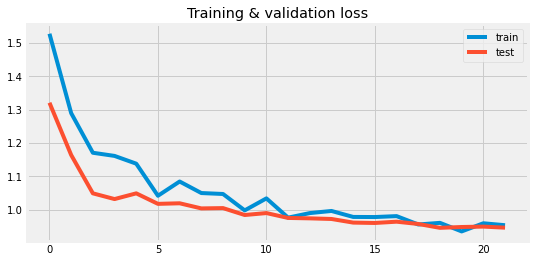

In [179]:
#plot
epochs = range(len(training_hist.history['loss'])) 
plt.figure(figsize = (8,4))
plt.plot(epochs, training_hist.history['loss'], label = 'train')
plt.plot(epochs, training_hist.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title('Training & validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

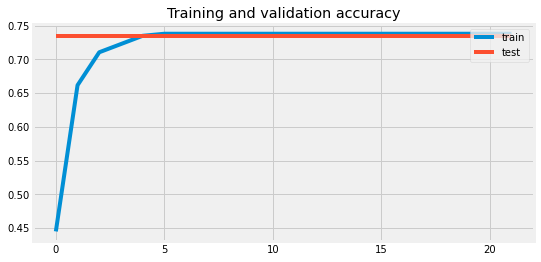

In [180]:
# plot accuracy learning curves
plt.figure(figsize = (8,4))
plt.plot(epochs, training_hist.history['acc'], label = 'train')
plt.plot(epochs, training_hist.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

*From the above graph we can say model is not overfitted and a goodfit.

In [181]:
# convert model to JSON
model_json = model.to_json()
with open("model_text_dl.json", "w") as json_file:
    json_file.write(model_json)    
#weights to HDF5
model.save_weights("model_text_dl.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("model_text_dl.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


#### NN with (Bow)

In [203]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(data['Clean_Description'], data['Accident_Level'].values, test_size=0.2, random_state=42)

print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 328
Validation utterances: 83


In [204]:
#NN for BOW
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train_nn)
X_test_bow = vectorizer.transform(X_test_nn)

In [205]:
#Convert to dummies
y_train_new = pd.get_dummies(y_train_nn)
y_test_new = pd.get_dummies(y_test_nn)

In [206]:
#Model
epochs = 50
batch_size = 8
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["categorical_accuracy"]

# Build neural network
bow_model = Sequential()
bow_model.add(Dense(512, activation='relu'))
bow_model.add(Dense(256, activation='relu'))
bow_model.add(Dense(5, activation='softmax'))

# compile the model
bow_model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Use earlystopping
callback = EarlyStopping(monitor='val_loss',mode='min', verbose=0,patience=3)

# fit the model
training = bow_model.fit(X_train_bow.toarray(), y_train_new, validation_split = 0.2, epochs=epochs, batch_size=batch_size, callbacks=callback)

Epoch 1/50
33/33 [==============================] - 3s 74ms/step - loss: 1.0079 - categorical_accuracy: 0.7481 - val_loss: 1.1536 - val_categorical_accuracy: 0.6515
Epoch 2/50
33/33 [==============================] - 2s 69ms/step - loss: 0.2718 - categorical_accuracy: 0.9313 - val_loss: 1.8114 - val_categorical_accuracy: 0.6515
Epoch 3/50
33/33 [==============================] - 2s 73ms/step - loss: 0.0362 - categorical_accuracy: 1.0000 - val_loss: 1.8294 - val_categorical_accuracy: 0.6212
Epoch 4/50
33/33 [==============================] - 2s 73ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 2.0640 - val_categorical_accuracy: 0.6212


In [207]:
bow_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               5513728   
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 1285      
Total params: 5,646,341
Trainable params: 5,646,341
Non-trainable params: 0
_________________________________________________________________


In [208]:
# evaluate the model
_,train_accuracy = bow_model.evaluate(X_train_bow.toarray(), y_train_new, verbose=0)
_,test_accuracy = bow_model.evaluate(X_test_bow.toarray(), y_test_new, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 92.38
Test accuracy: 71.08


In [209]:
# Validating the model on test set
loss, accuracy = bow_model.evaluate(X_test_bow.toarray(), y_test_new, verbose = 0)
loss, accuracy

(1.3174346685409546, 0.7108433842658997)

Text(0.5, 1.0, 'Training and validation loss')

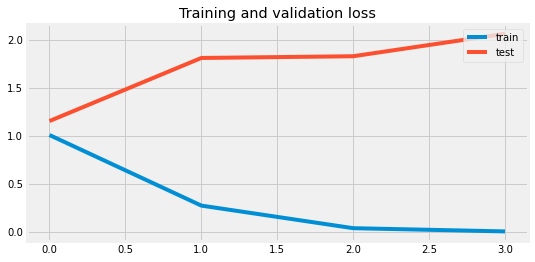

In [210]:
# Visualize loss curves
epochs = range(len(training.history['loss']))
plt.figure(figsize = (8,4))
plt.plot(epochs, training.history['loss'], label = 'train')
plt.plot(epochs, training.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

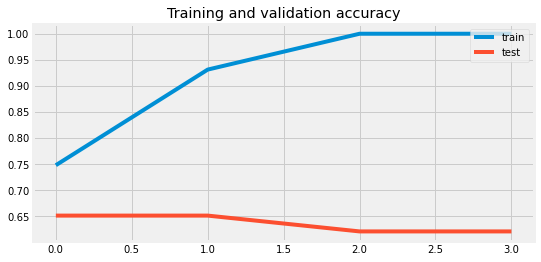

In [211]:
# plot accuracy curves
plt.figure(figsize = (8,4))
plt.plot(epochs, training.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

* The model is unfit for as it is performing poor when BOW is applied.

#### Word2Vec

In [212]:
# Converting words
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

#### CBOW

In [213]:
training = data['Clean_Description'].tolist() # Covnerting the text to list
training = [sentence.split(' ')  for sentence in training] # Splitting on each sentence which gives the multi dimensional list 
np.array(training[0]) # Priting the first sentence

array(['removing', 'drill', 'rod', 'jumbo', 'maintenance', 'supervisor',
       'proceeds', 'loosen', 'support', 'intermediate', 'centralizer',
       'facilitate', 'removal', 'seeing', 'mechanic', 'support', 'one',
       'end', 'drill', 'equipment', 'pull', 'hand', 'bar', 'accelerate',
       'removal', 'moment', 'bar', 'slide', 'point', 'support',
       'tightens', 'finger', 'mechanic', 'drilling', 'bar', 'beam',
       'jumbo'], dtype='<U12')

In [214]:
# Initiation of Word2Vec model
# Every word represented by 100 dimensions 
#ignore words which appears less than 2 times
#Import few necessary liraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
model = Word2Vec(sentences=training,
                 min_count =2,
                 sg=0)
print(model)

Word2Vec(vocab=1420, size=100, alpha=0.025)


In [215]:
# trained w2V are stored as model.wv
print(model.wv['removing'].reshape(1,100)) 
vectors = model.wv.vectors

[[ 5.4129749e-03  4.4435891e-03  4.9643014e-03 -5.4608035e-04
  -9.1052512e-03 -1.7132679e-02 -9.0339798e-03 -8.6480984e-03
  -6.6789486e-03 -1.3434893e-04  9.9588120e-03 -6.6267550e-03
  -1.1521302e-02  5.8961739e-03  1.2082548e-02 -5.7865437e-03
   5.2571995e-03 -8.3312357e-04  6.4606587e-03 -8.1119360e-03
   1.4687112e-02  1.0983681e-03 -7.9568122e-03  1.5812695e-02
  -2.9385589e-02  9.2995176e-03 -9.5515326e-03 -6.4607156e-03
   1.3739750e-02  1.1055496e-02 -3.2202737e-05 -1.9343356e-04
   1.6339843e-03  5.9734341e-03  2.7593188e-03  8.3906678e-03
   9.3058739e-03  2.6583849e-03  4.3341494e-03 -2.2782803e-02
  -5.1574940e-03  8.0936318e-03  2.1731327e-03  5.8302064e-03
   6.0324711e-03 -5.6012529e-03 -1.1713499e-02  2.2921418e-03
  -1.7206673e-02 -1.3703439e-02 -1.1416214e-02 -3.7200975e-03
   1.1348647e-02 -7.9300040e-03 -1.0860092e-02 -3.9871242e-03
  -5.5869292e-03  8.8811051e-03 -5.4309447e-03  4.9126997e-05
   5.1093446e-03  4.3190094e-03  2.1766881e-02 -6.4498832e-04
   1.162

In [216]:
#w2v on Description
tokenized_words = [i.split() for i in data['Clean_Description']]
wordvec_arrays = np.zeros((len(tokenized_words), 100))

for i in range(len(tokenized_words)):
    wordvec_arrays[i,:] = word_vector(tokenized_words[i], 100)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(411, 100)

In [217]:
# Splitting the data on word2vec embeddings
xtrain_w2v, xtest_w2v = train_test_split(wordvec_df, random_state=42, test_size=0.2)

In [218]:
def train_test_models_new(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['Logistic',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['KNN',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTree',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForest',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoost',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoosting',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)]]
    results_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_results = ml_models(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'none', 'none')

        # Store the accuracy results for each model in a dataframe for final comparison
        results_common = pd.concat([results_common, reg_results])
        i = i+1

    return results_common

In [219]:
#Ml models
train_test_models_new(xtrain_w2v, xtest_w2v, y_train, y_test,'none')

ML_Model  Train Accuracy  Test Accuracy  Precision    Recall  \
1              Logistic        0.737805       0.734940   0.540136  0.734940   
2                   KNN        0.746951       0.686747   0.544046  0.686747   
3                   SVC        0.737805       0.734940   0.540136  0.734940   
4          DecisionTree        1.000000       0.554217   0.581225  0.554217   
5          RandomForest        0.960366       0.710843   0.535326  0.710843   
6     BaggingClassifier        0.972561       0.722892   0.544400  0.722892   
7  ExtraTreesClassifier        0.996951       0.734940   0.540136  0.734940   
8              AdaBoost        0.679878       0.674699   0.567269  0.674699   
9      GradientBoosting        0.996951       0.674699   0.527649  0.674699   

   F1-Score  
1  0.622657  
2  0.607124  
3  0.622657  
4  0.564110  
5  0.610725  
6  0.621076  
7  0.622657  
8  0.616070  
9  0.592182

* When ml models are applied most of the models are poor except Adaboost and svc algorithm.

#### NN for CBOW

In [223]:
epochs = 50
batch_size = 10
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["categorical_accuracy"]

# Build neural network
cbow_model = Sequential()
cbow_model.add(Dense(512, activation='relu'))
cbow_model.add(Dense(256, activation='relu'))
cbow_model.add(Dense(1, activation='softmax'))

# compile the model
cbow_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Use earlystopping
callback = EarlyStopping(monitor='val_loss',mode='min', verbose=0,patience=3)

# fit the model
training_cbow = cbow_model.fit(xtrain_w2v, y_train, validation_data=(xtest_w2v, y_test), epochs=epochs, batch_size=batch_size, callbacks=callback)

Epoch 1/50
33/33 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0945 - val_loss: 0.0000e+00 - val_accuracy: 0.0964
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0945 - val_loss: 0.0000e+00 - val_accuracy: 0.0964
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0945 - val_loss: 0.0000e+00 - val_accuracy: 0.0964
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0945 - val_loss: 0.0000e+00 - val_accuracy: 0.0964


In [225]:
# evaluate the model
_,train_accuracy = cbow_model.evaluate(xtrain_w2v, y_train, verbose=0)
_,test_accuracy = cbow_model.evaluate(xtest_w2v, y_test, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 9.45
Test accuracy: 9.64


* Model is poor/overfitted so lets not to proceed in further steps.
* We can observe that when Bow/CBOW and Skipgram approaches are performed the model tends to be overfitted so cant move further.

#### Creating a model with categorical data

#### ML models

In [229]:
# Select input and output features
X_cat_data = ind_new.drop(['Accident_Level','Potential_Accident_Level'], axis = 1)
y_cat_data = data['Accident_Level']
#split data
X_cat_data_train, X_cat_data_test, y_cat_data_train, y_cat_data_test = train_test_split(X_cat_data, y_cat_data, test_size = 0.20, random_state = 1, stratify = y_cat_data)

Estimator: MultinomialNB()
Training accuracy: 73.17%
Testing accuracy: 71.08%
Precision: 0.565639
Recall: 0.710843
F1 score: 0.629824
Confusion matrix:
 [[58  0  0  3  0]
 [ 7  0  0  1  0]
 [ 6  0  0  0  0]
 [ 5  0  0  1  0]
 [ 1  0  0  1  0]]
Classification report:
               precision    recall  f1-score   support

           I       0.75      0.95      0.84        61
          II       0.00      0.00      0.00         8
         III       0.00      0.00      0.00         6
          IV       0.17      0.17      0.17         6
           V       0.00      0.00      0.00         2

    accuracy                           0.71        83
   macro avg       0.18      0.22      0.20        83
weighted avg       0.57      0.71      0.63        83



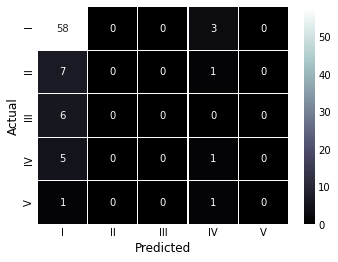

In [230]:
ml_classification(MultinomialNB(), X_cat_data_train, X_cat_data_test, y_cat_data_train, y_cat_data_test)

In [231]:
train_test_models(X_cat_data_train, X_cat_data_test, y_cat_data_train, y_cat_data_test,'none')

ML_Model  Train Accuracy  Test Accuracy  Precision    Recall  \
1               Logistic        0.737805       0.734940   0.540136  0.734940   
2          NB Classifier        0.731707       0.710843   0.565639  0.710843   
3                    KNN        0.756098       0.686747   0.530273  0.686747   
4                    SVC        0.737805       0.734940   0.540136  0.734940   
5           DecisionTree        0.993902       0.638554   0.577914  0.638554   
6           RandomForest        0.951220       0.674699   0.551141  0.674699   
7      BaggingClassifier        0.939024       0.734940   0.605104  0.734940   
8   ExtraTreesClassifier        0.990854       0.662651   0.531864  0.662651   
9               AdaBoost        0.673780       0.662651   0.538956  0.662651   
10      GradientBoosting        0.850610       0.746988   0.621563  0.746988   

    F1-Score  
1   0.622657  
2   0.629824  
3   0.598451  
4   0.622657  
5   0.606489  
6   0.604926  
7   0.653038  
8   0.590098  
9   0.594437  
10  0.663396

* Most of the models or overfitted except few algorithms like NB,SVC,Adaboost but the results are poor when compared along tfidf vector data so thus stop for further process. 

#### NN for Categorical data

In [249]:
# model
max_features = 5000
embedding_size = 256
model = Sequential()
model.add(Embedding(max_features, embedding_size,input_length = X_cat_data_train.shape[1]))
model.add(LSTM(512,dropout=0.2,recurrent_dropout=0.2,return_sequences=True))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['acc'])

# Use earlystopping
callback = EarlyStopping(monitor='val_loss',mode='min', verbose=0,patience=3)

# fit the model
training_history_cat = model.fit(X_cat_data_train, y_train_dummy, epochs=50, batch_size=8, verbose=1, validation_data=(X_cat_data_test,y_test_dummy), callbacks=callback)

Epoch 1/50
41/41 [==============================] - 40s 943ms/step - loss: 1.1614 - acc: 0.7043 - val_loss: 1.0505 - val_acc: 0.7349
Epoch 2/50
41/41 [==============================] - 37s 898ms/step - loss: 1.0513 - acc: 0.7378 - val_loss: 1.0072 - val_acc: 0.7349
Epoch 3/50
41/41 [==============================] - 37s 908ms/step - loss: 0.9744 - acc: 0.7378 - val_loss: 0.9726 - val_acc: 0.7349
Epoch 4/50
41/41 [==============================] - 37s 900ms/step - loss: 0.9729 - acc: 0.7378 - val_loss: 0.9326 - val_acc: 0.7349
Epoch 5/50
41/41 [==============================] - 37s 898ms/step - loss: 0.9075 - acc: 0.7317 - val_loss: 0.8951 - val_acc: 0.7349
Epoch 6/50
41/41 [==============================] - 37s 902ms/step - loss: 0.9038 - acc: 0.7409 - val_loss: 1.0279 - val_acc: 0.7349
Epoch 7/50
41/41 [==============================] - 37s 896ms/step - loss: 0.9088 - acc: 0.7409 - val_loss: 0.9493 - val_acc: 0.6867
Epoch 8/50
41/41 [==============================] - 37s 907ms/step - 

In [251]:
# evaluate the model
_,train_accuracy = model.evaluate(X_cat_data_train, y_train_dummy, verbose=0)
_,test_accuracy = model.evaluate(X_cat_data_test,y_test_dummy, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 74.39
Test accuracy: 73.49


Text(0.5, 1.0, 'Training and validation loss')

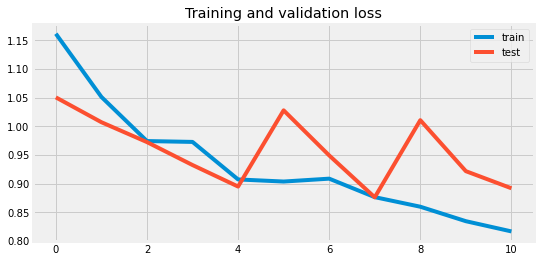

In [252]:
# Visualize loss curves
epochs = range(len(training_history_cat.history['loss']))
plt.figure(figsize = (8,4))
plt.plot(epochs, training_history_cat.history['loss'], label = 'train')
plt.plot(epochs, training_history_cat.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [260]:
def performance_report(X_cat_data_test,y_test_dummy):
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    predict_x=model.predict(X_cat_data_test)
   
    classes_x=np.argmax(predict_x,axis=1)
    
    y_test=np.argmax(y_test_dummy, axis=1)
    accuracy = accuracy_score(y_test,classes_x)

    precision = precision_score(y_test, classes_x,average='micro')
    
    recall = recall_score(y_test, classes_x,average='micro')
  
    f1 = f1_score(y_test, classes_x,average='micro')
    return accuracy, precision, recall, f1

In [261]:
accuracy, precision, recall, f1=performance_report(X_cat_data_test,y_test_dummy)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.734940
Precision: 0.734940
Recall: 0.734940
F1 score: 0.734940


In [262]:
# convert model to JSON
model_json = model.to_json()
with open("model_text_data_dl.json", "w") as json_file:
    json_file.write(model_json)    
#weights to HDF5
model.save_weights("model_text_data_dl.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("model_text_data_dl.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### Deployment

#### Using Streamlit Framework deployed on Heroku

* Once the model has good results, we deploy the model either in the cloud or other place. Once we deploy, we monitor the performance of the model.if its good we go live with the model or reiterate the process until our model performance is good. Thus, here I am deploying the model using streamlit framework GUI to Heroku whic is a container-based cloud Platform as a Service (PaaS).

#### Screenshots of Model Predictions using chat interface:

<img src="capture.PNG" style="width:800px;height:600px"/>

<img src="capture3.PNG" style="width:800px;height:600px"/>

* For runing in the local machine go to the right directory and run streamlit app.py

## Link for testing the Model Predictions :
https://accident-level-predictor.herokuapp.com/

##### Conclusion

* In this project from the EDA we have analyzed the scope of every attribute that is necessary for model building.
* As the attributes are categorical and text data we have identified there are no outliers in the data.
* In the data cleaning part we identified duplicates in the dataset as well as Description column and removed it.
* The dataset consists of no missing values.
* Coming to the Accident_Level which is the target column the distribution is not equal which cause class imbalance problem.
* Applied SMOTE and other sampling techniques to overcome data imbalance issue.
* Through EDA/NLP analysis we hae identified the major cause of accidents are through by hand operations and description column(text) is very helpful to identify the accident cause.
* Performed couple of visualization techniques such as network graph and wordcloud on text data.
* NLP analysis such as Textcleaning and feature engineering like tfidf, word2vec as performed. 
* Converted categorical to numerical variables and performed model building.
* Model building was performed in different aspects such as with tfidf encoded values and the attributes also with dummy variables.
* Also, to reduce the occurrences of accidents, more safety standards in hand-operation is needed. 
###### Model Performance:
* From the model building aspect along with tfidf vectors and original data we can say SVC and Adaboost models have performed well in between the accuracy of 71.08 to 73.24% and with f1-score in the range of 62.2 to 63.32%.
* When hyperparameter tuning was applied SVC-linear has best result with params {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} around 73.72% also GBM model have the approximate results.
* Performed smoting and sampling techniques where the results are poor other than few algorithms.
* When DL classifier LSTM was applied on whole data the accuracy achieved was around 73.49% with weighted avg f1-score  of 62.26%.
* When ML and DL classifiers applied on sampling and smote techniques most of the models tends to overfit and outperform on the data and were not useful.
* Model building on word2vec, cbow have tend to overfit and performance results were poor.
* Finally by comparing the results from all ML methods we choose svc classifier for production to predict the accident level.
* All the pickled models are used for creating a UI chatbot interface. 
* Using sreamlit framework the model is deployed on cloud to get the Accident_level prediction output.
